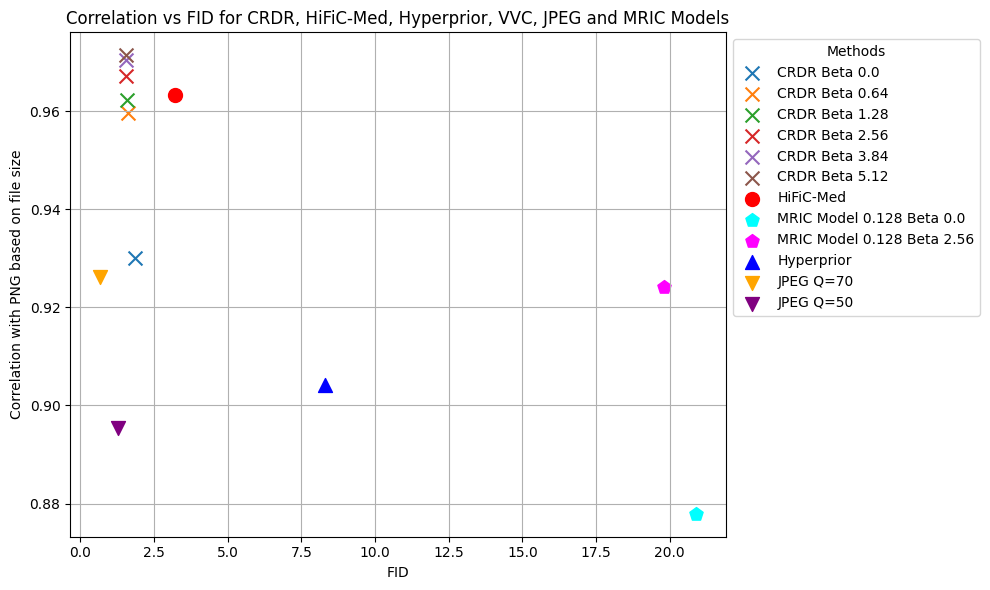

In [2]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pandas as pd

csv_path = "file_size_in_bytes.csv"
beta_values = [0.0, 0.64, 1.28, 2.56, 3.84, 5.12]
df = pd.read_csv(csv_path)
mric_beta_values = [0.0, 2.56]

    
    # Extract FID row (second row)
fid_row = df.iloc[0].to_dict()
    
fids_crdr = [float(fid_row[f"CRDR Beta {b}"]) for b in [0.0, 0.64, 1.28, 2.56, 3.84, 5.12]]
fid_hific = float(fid_row["HiFiC-Med"])
fid_hyperprior = float(fid_row["Hyperprior"])
fid_jpeg = float(fid_row["JPEG Quality 70"])
fid_jpeg_50 = float(fid_row["JPEG Quality 50"])
fids_mric = [float(fid_row[f"MRIC Beta {b}"]) for b in [0.0, 2.56]]

df = df.iloc[1:]  # Skip FID row
df = df.reset_index(drop=True)

    
png_sizes = df["PNG Size"].astype(int).to_numpy()
crdr_sizes = {
    b: df[f"CRDR Beta {b}"].astype(int).to_numpy()
    for b in [0.0, 0.64, 1.28, 2.56, 3.84, 5.12]
    }

hific_sizes = df["HiFiC-Med"].astype(int).to_numpy()
hyperprior_sizes = df["Hyperprior"].astype(int).to_numpy()
jpeg_sizes = df["JPEG Quality 70"].astype(int).to_numpy()
jpeg_50_sizes = df["JPEG Quality 50"].astype(int).to_numpy()
mric_sizes = {
    b: df[f"MRIC Beta {b}"].astype(int).to_numpy()
    for b in [0.0, 2.56]
    }

corr_hific, _ = pearsonr(png_sizes, hific_sizes)
corr_hyperprior, _ = pearsonr(png_sizes, hyperprior_sizes)
corr_jpeg, _ = pearsonr(png_sizes, jpeg_sizes)
corr_jpeg_50, _ = pearsonr(png_sizes, jpeg_50_sizes)

correlations_mric = []
for beta in [0.0, 2.56]:
    corr_mric, _ = pearsonr(png_sizes, mric_sizes[beta])
    correlations_mric.append(corr_mric)

correlations_crdr = []
for beta in [0.0, 0.64, 1.28, 2.56, 3.84, 5.12]:
    corr_crdr, _ = pearsonr(png_sizes, crdr_sizes[beta])
    correlations_crdr.append(corr_crdr)


plt.figure(figsize=(10, 6))
for i, beta in enumerate(beta_values):
    plt.scatter(fids_crdr[i], correlations_crdr[i], label=f"CRDR Beta {beta}", s=100, marker='x')

plt.scatter(fid_hific, corr_hific, label="HiFiC-Med", s=100, marker='o', color='red')

for i, beta in enumerate(mric_beta_values):
    plt.scatter(fids_mric[i], correlations_mric[i], label=f"MRIC Model 0.128 Beta {beta}", s=100, marker='p', color='cyan' if beta == 0.0 else 'magenta')

plt.scatter(fid_hyperprior, corr_hyperprior, label="Hyperprior", s=100, marker='^', color='blue')

plt.scatter(fid_jpeg, corr_jpeg, label="JPEG Q=70", s=100, marker='v', color='orange')

plt.scatter(fid_jpeg_50, corr_jpeg_50, label="JPEG Q=50", s=100, marker='v', color='purple')

plt.xlabel("FID")
plt.ylabel("Correlation with PNG based on file size")
plt.title("Correlation vs FID for CRDR, HiFiC-Med, Hyperprior, VVC, JPEG and MRIC Models")
plt.legend(title="Methods", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


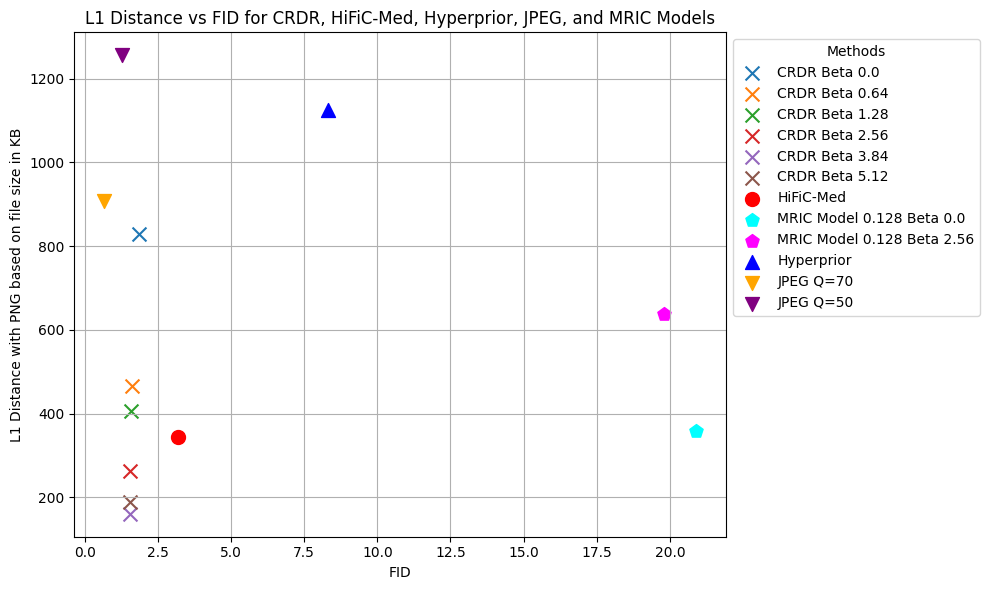

In [8]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
import csv

csv_path = "file_size_in_bytes.csv"

df = pd.read_csv(csv_path)
    
fid_row = df.iloc[0].to_dict()
    
fids_crdr = [float(fid_row[f"CRDR Beta {b}"]) for b in [0.0, 0.64, 1.28, 2.56, 3.84, 5.12]]
fid_hific = float(fid_row["HiFiC-Med"])
fid_hyperprior = float(fid_row["Hyperprior"])
fid_jpeg = float(fid_row["JPEG Quality 70"])
fid_jpeg_50 = float(fid_row["JPEG Quality 50"])
fids_mric = [float(fid_row[f"MRIC Beta {b}"]) for b in [0.0, 2.56]]

df = df.iloc[1:]  # Skip FID row
df = df.reset_index(drop=True)

png_sizes = df["PNG Size"].astype(int).to_numpy()
crdr_sizes = {
    b: df[f"CRDR Beta {b}"].astype(int).to_numpy()
    for b in [0.0, 0.64, 1.28, 2.56, 3.84, 5.12]
    }
hific_sizes = df["HiFiC-Med"].astype(int).to_numpy()
hyperprior_sizes = df["Hyperprior"].astype(int).to_numpy()
jpeg_sizes = df["JPEG Quality 70"].astype(int).to_numpy()
jpeg_50_sizes = df["JPEG Quality 50"].astype(int).to_numpy()
mric_sizes = {
        b: df[f"MRIC Beta {b}"].astype(int).to_numpy()
        for b in [0.0, 2.56]
    }

  
l1_distances_crdr = []
for beta in [0.0, 0.64, 1.28, 2.56, 3.84, 5.12]:
    l1_distance = np.mean(np.abs(png_sizes - crdr_sizes[beta]))
    l1_distances_crdr.append(l1_distance)

l1_distance_hific = np.mean(np.abs(png_sizes - hific_sizes))    
l1_distance_hyperprior = np.mean(np.abs(png_sizes - hyperprior_sizes))

l1_distance_jpeg = np.mean(np.abs(png_sizes - jpeg_sizes))

l1_distance_jpeg_50 = np.mean(np.abs(png_sizes - jpeg_50_sizes))


l1_distances_mric = []
for beta in [0.0, 2.56]:
    l1_distance_mric = np.mean(np.abs(png_sizes - mric_sizes[beta]))
    l1_distances_mric.append(l1_distance_mric)

l1_distances_crdr_kb = [d / 1024 for d in l1_distances_crdr]
l1_distance_hific_kb = l1_distance_hific / 1024
l1_distance_hyperprior_kb = l1_distance_hyperprior / 1024
l1_distance_jpeg_kb = l1_distance_jpeg / 1024
l1_distance_jpeg_50_kb = l1_distance_jpeg_50 / 1024
l1_distances_mric_kb = [d / 1024 for d in l1_distances_mric]


plt.figure(figsize=(10, 6))

# CRDR points
for i, beta in enumerate(beta_values):
    plt.scatter(fids_crdr[i], l1_distances_crdr_kb[i], label=f"CRDR Beta {beta}", s=100, marker='x')

plt.scatter(fid_hific, l1_distance_hific_kb, label="HiFiC-Med", s=100, marker='o', color='red')

for i, beta in enumerate(mric_beta_values):
    plt.scatter(fids_mric[i], l1_distances_mric_kb[i], label=f"MRIC Model 0.128 Beta {beta}", s=100, marker='p', color='cyan' if beta == 0.0 else 'magenta')

plt.scatter(fid_hyperprior, l1_distance_hyperprior_kb, label="Hyperprior", s=100, marker='^', color='blue')

plt.scatter(fid_jpeg, l1_distance_jpeg_kb, label="JPEG Q=70", s=100, marker='v', color='orange')
plt.scatter(fid_jpeg_50, l1_distance_jpeg_50_kb, label="JPEG Q=50", s=100, marker='v', color='purple')


plt.xlabel("FID")
plt.ylabel("L1 Distance with PNG based on file size in KB")
plt.title("L1 Distance vs FID for CRDR, HiFiC-Med, Hyperprior, JPEG, and MRIC Models")
plt.legend(title="Methods", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

plt.show()


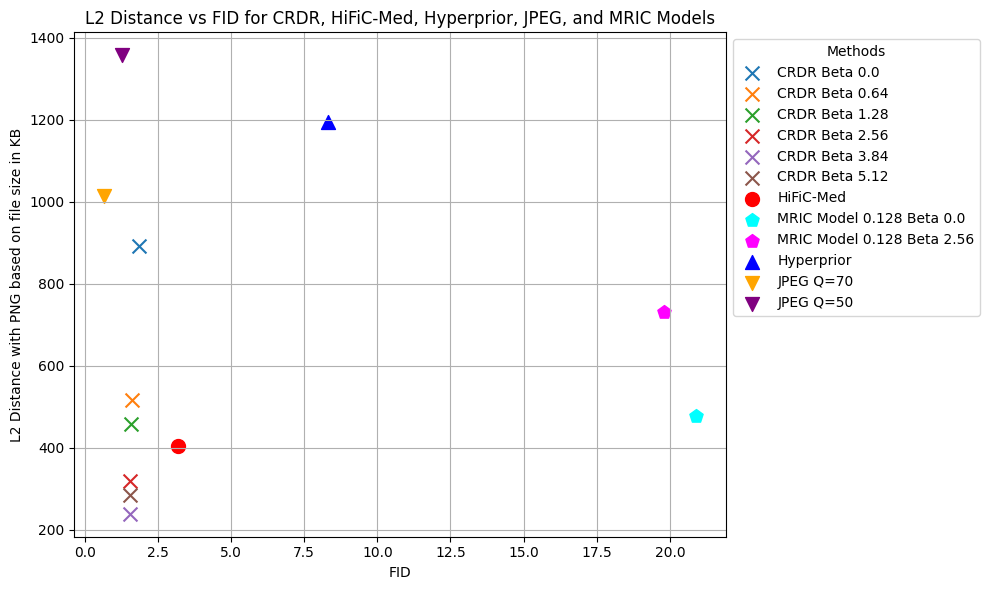

In [4]:
l2_distances_crdr = [
    np.sqrt(np.mean((png_sizes - crdr_sizes[b]) ** 2)) for b in beta_values
]
l2_distance_hific = np.sqrt(np.mean((png_sizes - hific_sizes) ** 2))
l2_distance_hyperprior = np.sqrt(np.mean((png_sizes - hyperprior_sizes) ** 2))
l2_distance_jpeg = np.sqrt(np.mean((png_sizes - jpeg_sizes) ** 2))
l2_distance_jpeg_50 = np.sqrt(np.mean((png_sizes - jpeg_50_sizes) ** 2))
l2_distances_mric = [
    np.sqrt(np.mean((png_sizes - mric_sizes[b]) ** 2)) for b in mric_beta_values
]

# Convert to KB
l2_distances_crdr_kb = [d / 1024 for d in l2_distances_crdr]
l2_distance_hific_kb = l2_distance_hific / 1024
l2_distance_hyperprior_kb = l2_distance_hyperprior / 1024
l2_distance_jpeg_kb = l2_distance_jpeg / 1024
l2_distance_jpeg_50_kb = l2_distance_jpeg_50 / 1024
l2_distances_mric_kb = [d / 1024 for d in l2_distances_mric]


csv_data = []

# CRDR
for beta, dist_kb in zip([0.0, 0.64, 1.28, 2.56, 3.84, 5.12], l2_distances_crdr_kb):
    csv_data.append({"Algorithm": f"CRDR Beta {beta}", "Mean L2 Distance (KB)": dist_kb})

# HiFiC
csv_data.append({"Algorithm": "HiFiC-Med", "Mean L2 Distance (KB)": l2_distance_hific_kb})

# Hyperprior
csv_data.append({"Algorithm": "Hyperprior", "Mean L2 Distance (KB)": l2_distance_hyperprior_kb})

# JPEG
csv_data.append({"Algorithm": "JPEG Q=70", "Mean L2 Distance (KB)": l2_distance_jpeg_kb})
csv_data.append({"Algorithm": "JPEG Q=50", "Mean L2 Distance (KB)": l2_distance_jpeg_50_kb})

# MRIC
for beta, dist_kb in zip([0.0, 2.56], l2_distances_mric_kb):
    csv_data.append({"Algorithm": f"MRIC Beta {beta}", "Mean L2 Distance (KB)": dist_kb})

# Save to CSV
output_csv_path = "mean_l2_distances.csv"
pd.DataFrame(csv_data).to_csv(output_csv_path, index=False)
# --- Plot ---
plt.figure(figsize=(10, 6))

for i, beta in enumerate(beta_values):
    plt.scatter(fids_crdr[i], l2_distances_crdr_kb[i],
                label=f"CRDR Beta {beta}", s=100, marker='x')

plt.scatter(fid_hific, l2_distance_hific_kb, label="HiFiC-Med", s=100, marker='o', color='red')

for i, beta in enumerate(mric_beta_values):
    plt.scatter(fids_mric[i], l2_distances_mric_kb[i],
                label=f"MRIC Model 0.128 Beta {beta}",
                s=100, marker='p', color='cyan' if beta == 0.0 else 'magenta')

plt.scatter(fid_hyperprior, l2_distance_hyperprior_kb, label="Hyperprior", s=100, marker='^', color='blue')
plt.scatter(fid_jpeg, l2_distance_jpeg_kb, label="JPEG Q=70", s=100, marker='v', color='orange')
plt.scatter(fid_jpeg_50, l2_distance_jpeg_50_kb, label="JPEG Q=50", s=100, marker='v', color='purple')

plt.xlabel("FID")
plt.ylabel("L2 Distance with PNG based on file size in KB")
plt.title("L2 Distance vs FID for CRDR, HiFiC-Med, Hyperprior, JPEG, and MRIC Models")
plt.legend(title="Methods", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

['tiff_l1', 'fid', 'psnr', 'jpeg2000_lossless_l1', 'ncd_zlib', 'png_l1', 'ncd_bz2', 'webp_lossless_l1']
Available distortion types in CSV:
['noise' 'jpeg' 'jpeg 2000' 'fnoise' 'blur' 'contrast']

Distortion types with complete data in both files: ['noise', 'jpeg', 'jpeg 2000', 'fnoise', 'blur', 'contrast']
Overall agreement for fid: 84.7%
Overall agreement for jpeg2000_lossless_l1: 78.8%
Overall agreement for ncd_bz2: 76.1%
Overall agreement for ncd_zlib: 66.7%
Overall agreement for png_l1: 80.8%
Overall agreement for psnr: 20.9%
Overall agreement for tiff_l1: 65.8%
Overall agreement for webp_lossless_l1: 79.1%


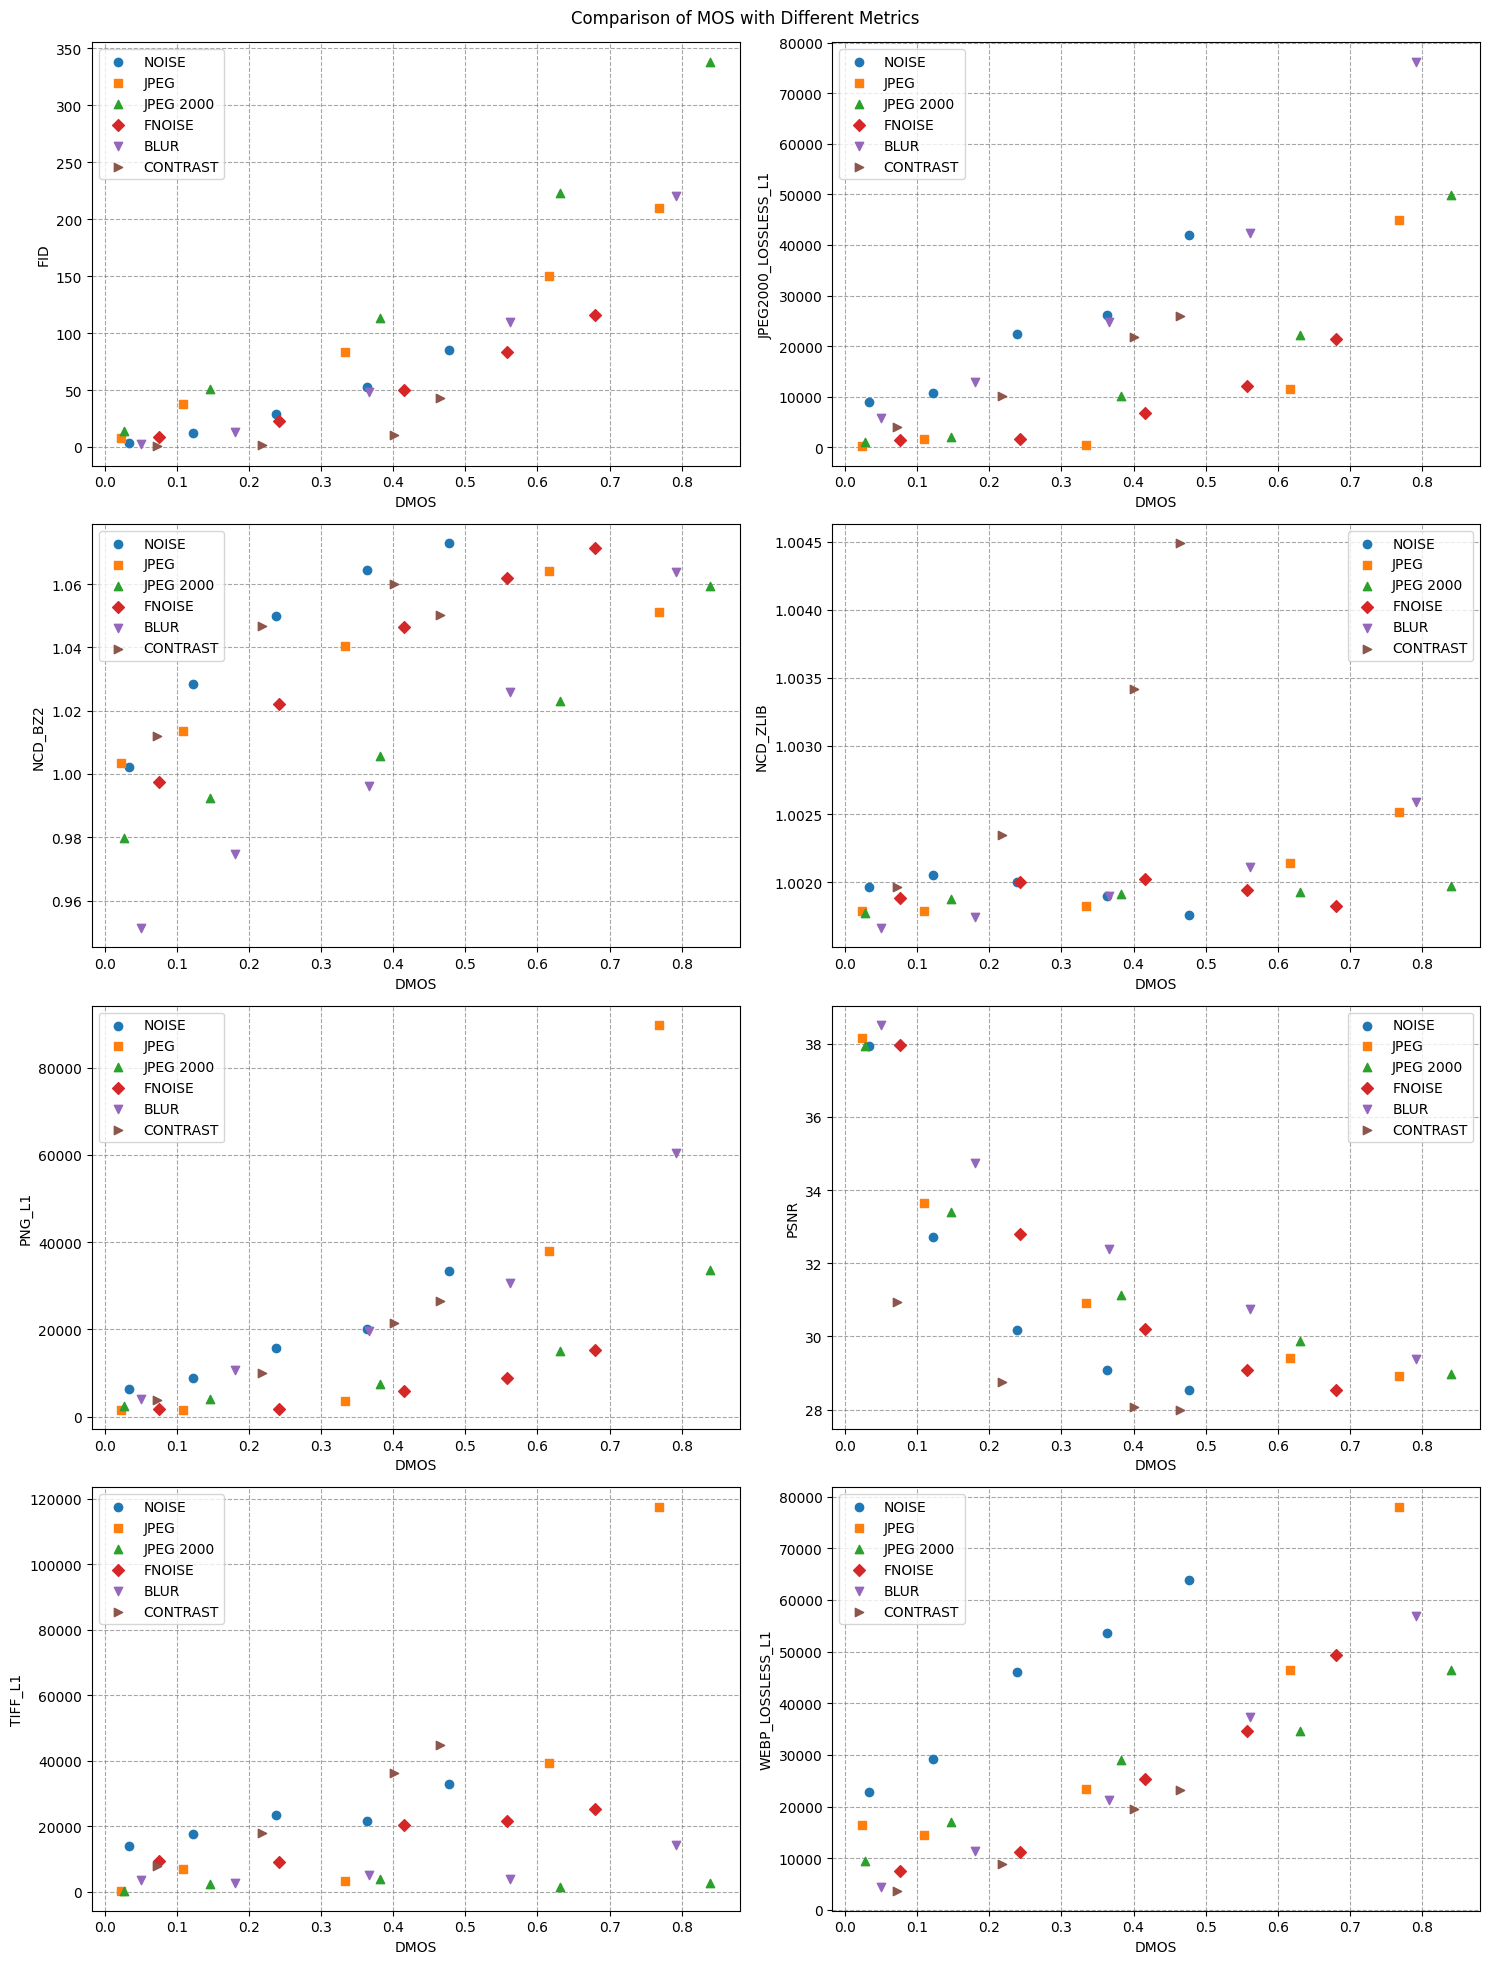

In [20]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations

def calculate_agreement(mos_scores, metric_scores):
    """
    Calculate agreement between DMOS and metric scores for all possible pairs.
    Returns the percentage of pairs where both metrics agree on the ordering.
    """
    n = len(mos_scores)
    agreements = 0
    total_pairs = 0
  
    for i, j in combinations(range(n), 2):
        mos_order = mos_scores[i] > mos_scores[j]
        metric_order = metric_scores[i] > metric_scores[j]
        
        if mos_order == metric_order:
            agreements += 1
        total_pairs += 1
    
    return (agreements / total_pairs) * 100 if total_pairs > 0 else 0

df = pd.read_csv('Image Realism Files/csiq.DMOS.csv')

with open('Image Realism Files/fid_scores.json', 'r') as f:
    fid_data = json.load(f)

metrics = set()
for dst_type in fid_data:
    if fid_data[dst_type]:  # Check if the distortion type has data
        for level in fid_data[dst_type]:
            metrics.update(set(list(fid_data[dst_type][level].keys())))

#filter out only these metrics: fid, jpeg2000_lossless_l1, jpeg2000_lossless_l2, ncd_bz2, ncd_zlib, png_l1, png_l2, psnr, tiff_l1, tiff_l2, webp_lossless_l1, webp_lossless_l2
metrics = [m for m in metrics if m in ['fid', 'jpeg2000_lossless_l1', 'ncd_bz2', 'ncd_zlib', 'png_l1', 'psnr', 'tiff_l1', 'webp_lossless_l1']]
print(metrics)


print("Available distortion types in CSV:")
print(df['dst_type'].unique())

# Mapping between CSV and JSON distortion type names
distortion_mapping = {
    'noise': 'awgn',  # Map 'noise' in CSV to 'awgn' in JSON
    'jpeg': 'jpeg',
    'blur': 'blur',
    'jpeg 2000': 'jpeg2000',  # Updated to match CSV format
    'fnoise': 'fnoise',
    'contrast': 'contrast'
}

# Get distortion types that have complete data in both CSV and JSON
available_types = []
for csv_type in df['dst_type'].unique():
    json_type = distortion_mapping.get(csv_type)
    if (json_type and json_type in fid_data and 
        fid_data[json_type] and  # Check if the distortion type has data
        len(fid_data[json_type]) == 5 and 
        all(str(lev) in fid_data[json_type] for lev in range(1, 6))):
        available_types.append((csv_type, json_type))

print("\nDistortion types with complete data in both files:", [csv_type for csv_type, _ in available_types])


n_metrics = len(metrics)
n_cols = 2
n_rows = (n_metrics + n_cols - 1) // n_cols  # Ceiling division to calculate number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.suptitle('Comparison of MOS with Different Metrics')

# Store agreement scores
agreement_scores = {}

all_mos_scores = []
all_metric_scores = {metric: [] for metric in metrics}

markers = ['o', 's', '^', 'D', 'v', '>', '<', 'p', '*', 'h', 'x', 'd', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

for csv_type, json_type in available_types:
    # Get MOS scores for this distortion type
    mos_data = df[df['dst_type'] == csv_type].groupby('dst_lev')['dmos'].mean()
    all_mos_scores.extend(mos_data.values)
    
    # Get metric scores for this distortion type
    for metric in metrics:
        metric_scores = [fid_data[json_type][str(lev)][metric] for lev in range(1, 6)]
        all_metric_scores[metric].extend(metric_scores)

# Calculate overall agreement for each metric
metrics = list(metrics)
metrics.sort()
for metric in metrics:
    agreement = calculate_agreement(all_mos_scores, all_metric_scores[metric])
    agreement_scores[metric] = agreement
    print(f"Overall agreement for {metric}: {agreement:.1f}%")

for idx, metric in enumerate(metrics):
    row = idx // n_cols  # Calculate row index
    col = idx % n_cols   # Calculate column index
    ax = axes[row, col]
    
    for i, (csv_type, json_type) in enumerate(available_types):
        mos_data = df[df['dst_type'] == csv_type].groupby('dst_lev')['dmos'].mean()
        
        metric_scores = [fid_data[json_type][str(lev)][metric] for lev in range(1, 6)]
        min_length = min(len(mos_data.values), len(metric_scores))
        mos_values = mos_data.values[:min_length]
        metric_values = metric_scores[:min_length]
        ax.scatter(mos_values, metric_values, marker=markers[i], label=csv_type.upper())
    
    ax.set_xlabel('DMOS')
    ax.set_ylabel(metric.upper())
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7, color='gray')
    ax.set_axisbelow(True)  

for idx in range(len(metrics), n_rows * n_cols):
    row = idx // n_cols
    col = idx % n_cols
    axes[row, col].axis('off')

plt.savefig("CSIQ_MOS.pdf", format="pdf")  

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()
plt.close()



['tiff_l1', 'fid', 'psnr', 'jpeg2000_lossless_l1', 'ncd_zlib', 'png_l1', 'ncd_bz2', 'webp_lossless_l1']
Available distortion types in CSV:
['gblur' 'lbur' 'mblur' 'color_diffusion' 'color_shift'
 'color_quantization' 'color_saturation1' 'color_saturation2' 'jpeg2000'
 'jpeg' 'white_noise' 'white_noise_color' 'impulse_noise'
 'multiplicative_noise' 'denoise' 'brighten' 'darken' 'mean_shift'
 'jitter' 'non_eccentricity_patch' 'pixelate' 'quantization' 'color_block'
 'high_sharpen' 'contrast_change']

Distortion types with complete data in both files: ['gblur', 'mblur', 'color_diffusion', 'color_shift', 'color_quantization', 'color_saturation1', 'color_saturation2', 'jpeg2000', 'jpeg', 'white_noise', 'white_noise_color', 'impulse_noise', 'multiplicative_noise', 'denoise', 'brighten', 'darken', 'mean_shift', 'jitter', 'non_eccentricity_patch', 'pixelate', 'quantization', 'high_sharpen', 'contrast_change']
MOS: len=115, Metric: len=115
Overall agreement for fid: 82.7%
MOS: len=115, Metric: 

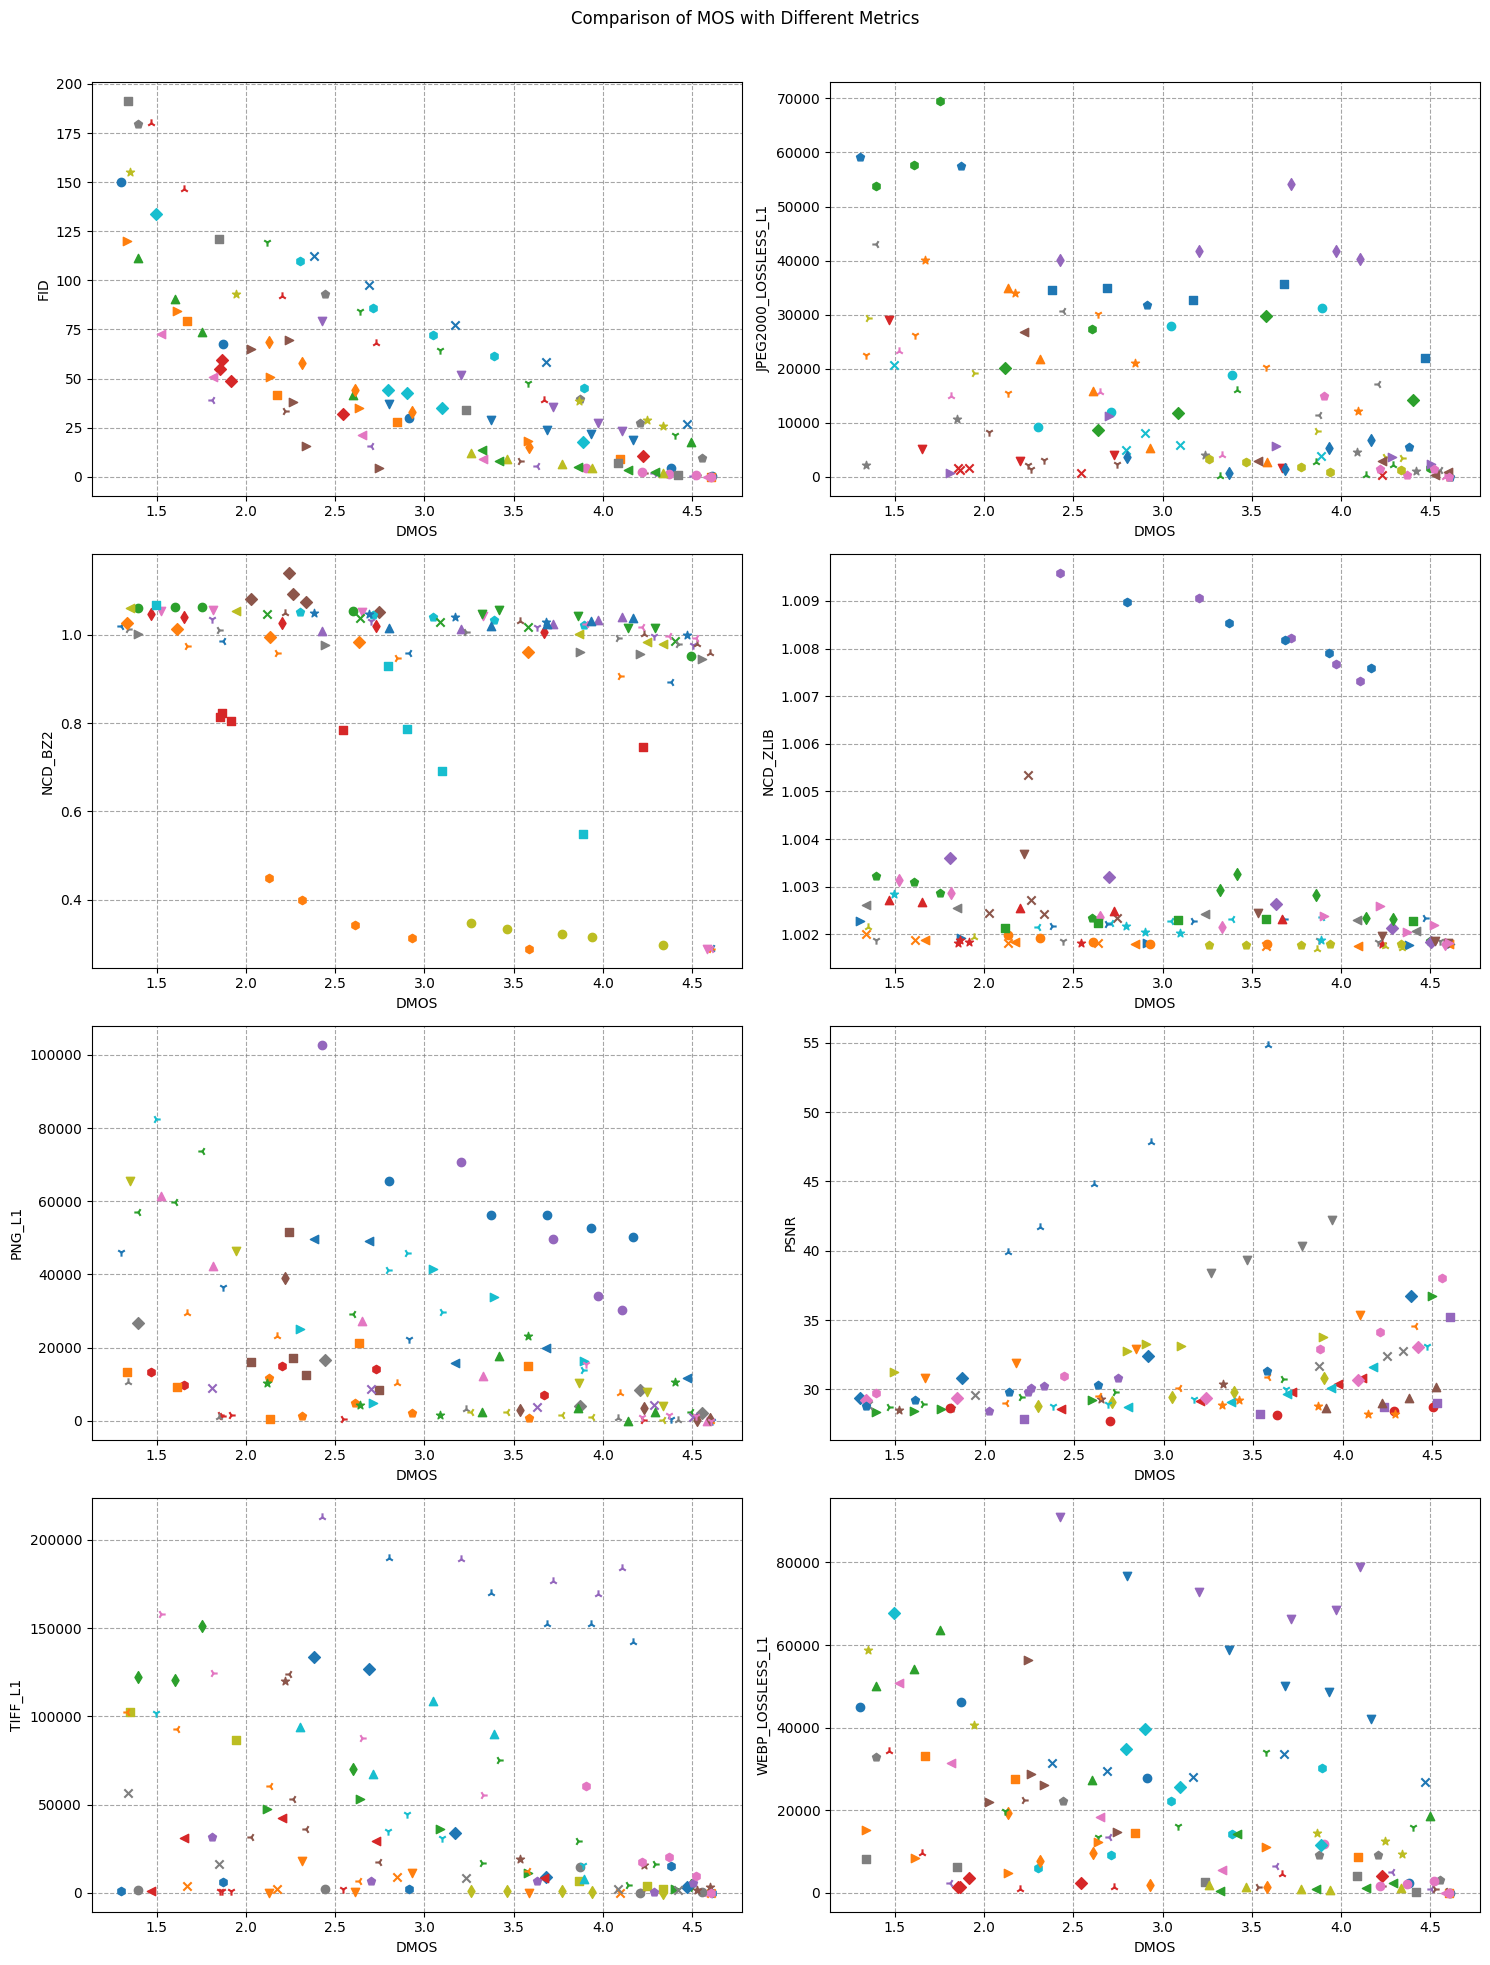

In [36]:
from itertools import combinations, cycle
def calculate_agreement(mos_scores, metric_scores, reverse=False):

    """
    Calculate agreement between MOS and metric scores for all possible pairs.
    Returns the percentage of pairs where both metrics agree on the ordering.
    """
    n = len(mos_scores)
    agreements = 0
    total_pairs = 0

    print(f"MOS: len={len(mos_scores)}, Metric: len={len(metric_scores)}")

    if reverse:
        mos_scores = [-score for score in mos_scores]
    
    for i, j in combinations(range(n), 2):
        mos_order = mos_scores[i] > mos_scores[j]
        metric_order = metric_scores[i] > metric_scores[j]
        
        if mos_order == metric_order:
            agreements += 1
        total_pairs += 1
    
    return (agreements / total_pairs) * 100 if total_pairs > 0 else 0

# Read the CSV file
df = pd.read_csv('Image Realism Files/kadid_dmos_2.csv')

# Read the JSON file
with open('Image Realism Files/fid_scores_kadid.json', 'r') as f:
    fid_data = json.load(f)


# # Add combined metric to the JSON data
# for dst_lev in fid_data:
#     if fid_data[dst_lev]:  # Check if the distortion type has data
#         for level in fid_data[dst_lev]:
#             fid = fid_data[dst_lev][level]['fid']
#             l1 = fid_data[dst_lev][level]['komorow_l1']
#             fid_data[dst_lev][level]['combined'] = np.log(fid * l1)

metrics = set()
for dist_type in fid_data:
    if fid_data[dist_type]:  # Check if the distortion type has data
        for level in fid_data[dist_type]:
            metrics.update(set(list(fid_data[dist_type][level].keys())))

#filter out only these metrics: fid, jpeg2000_lossless_l1, jpeg2000_lossless_l2, ncd_bz2, ncd_zlib, png_l1, png_l2, psnr, tiff_l1, tiff_l2, webp_lossless_l1, webp_lossless_l2
metrics = [m for m in metrics if m in ['fid', 'jpeg2000_lossless_l1', 'ncd_bz2', 'ncd_zlib', 'png_l1', 'psnr', 'tiff_l1', 'webp_lossless_l1']]
print(metrics)

# Print available distortion types in CSV
print("Available distortion types in CSV:")
print(df['dst_type'].unique())

# Mapping between CSV and JSON distortion type names
distortion_mapping = {  # Map 'noise' in CSV to 'awgn' in JSON
    "gblur": "gblur", "lblur": "lbur", "mblur": "mblur",
    "color_diffusion": "color_diffusion", "color_shift": "color_shift", "color_quantization": "color_quantization",
    "color_saturation1": "color_saturation1", "color_saturation2": "color_saturation2",
    "jpeg2000": "jpeg2000", "jpeg": "jpeg",
    "white_noise": "white_noise", "white_noise_color": "white_noise_color", "impulse_noise": "impulse_noise", "multiplicative_noise": "multiplicative_noise", "denoise": "denoise",
    "brighten": "brighten", "darken": "darken", "mean_shift": "mean_shift",
    "jitter": "jitter", "non_eccentricity_patch": "non_eccentricity_patch", "pixelate": "pixelate", "quantization": "quantization",
    "high_sharpen": "high_sharpen", "contrast_change": "contrast_change",
}

# Get distortion types that have complete data in both CSV and JSON
available_types = []
for csv_type in df['dst_type'].unique():
    json_type = distortion_mapping.get(csv_type)
    if (json_type and json_type in fid_data and 
        fid_data[json_type] and  # Check if the distortion type has data
        len(fid_data[json_type]) == 5 and 
        all(str(lev) in fid_data[json_type] for lev in range(1, 6))):
        available_types.append((csv_type, json_type))

print("\nDistortion types with complete data in both files:", [csv_type for csv_type, _ in available_types])

# Create a figure with subplots for each metric comparison

n_metrics = len(metrics)
n_cols = 2
n_rows = (n_metrics + n_cols - 1) // n_cols  # Ceiling division to calculate number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.suptitle('Comparison of MOS with Different Metrics')

# Store agreement scores
agreement_scores = {}

# Collect all MOS and metric scores across all distortion types
all_mos_scores = []
all_metric_scores = {metric: [] for metric in metrics}

# Define markers for different distortion types
marker_cycle = cycle(['o', 's', '^', 'D', 'v', '>', '<', 'p', '*', 'h', 'x', 'd', '1', '2', '3', '4'])


for csv_type, json_type in available_types:
    # Get MOS scores for this distortion type
    mos_data = df[df['dst_type'] == csv_type].groupby('dst_lev')['dmos'].mean()
    all_mos_scores.extend(mos_data.values)
    
    # Get metric scores for this distortion type
    for metric in metrics:
        metric_scores = [fid_data[json_type][str(lev)][metric] for lev in range(1, 6)]
        all_metric_scores[metric].extend(metric_scores)

# Calculate overall agreement for each metric
metrics = list(metrics)
reverse_metrics = [
    'fid', 'jpeg2000_lossless_l1', 'ncd_bz2', 'ncd_zlib',
    'png_l1', 'tiff_l1', 'webp_lossless_l1'
]
metrics.sort()
for metric in metrics:
    reverse = metric in reverse_metrics
    agreement = calculate_agreement(all_mos_scores, all_metric_scores[metric],reverse)
    agreement_scores[metric] = agreement
    print(f"Overall agreement for {metric}: {agreement:.1f}%")

for idx, metric in enumerate(metrics):
    row = idx // n_cols  # Calculate row index
    col = idx % n_cols   # Calculate column index
    ax = axes[row, col]
    
    # Plot each distortion type with different markers
    for i, (csv_type, json_type) in enumerate(available_types):
        # Get MOS scores for this distortion type
        mos_data = df[df['dst_type'] == csv_type].groupby('dst_lev')['dmos'].mean()
        
        # Get metric scores for this distortion type
        mos_values = []
        metric_values = []

        for lev in range(1, 6):
            try:
                mos_score = df[(df['dst_type'] == csv_type) & (df['dst_lev'] == lev)]['dmos'].mean()
                metric_score = fid_data[json_type][str(lev)][metric]

                # Skip if metric score is infinite
                if not np.isinf(metric_score):
                    mos_values.append(mos_score)
                    metric_values.append(metric_score)
            except KeyError:
                continue  # If level missing, skip
        
        # Ensure we only use data points that exist in both datasets
        if mos_values and metric_values:  # Only plot if we have valid data
            ax.scatter(mos_values, metric_values, marker=next(marker_cycle), label=csv_type.upper())

    if idx == 0:
                legend_handles, legend_labels = ax.get_legend_handles_labels()        


        
  
    
    ax.set_xlabel('DMOS')
    ax.set_ylabel(metric.upper())
    
    ax.grid(True, linestyle='--', alpha=0.7, color='gray')
    ax.set_axisbelow(True)  # This puts the grid behind the data points


# Hide any unused subplots
for idx in range(len(metrics), n_rows * n_cols):
    row = idx // n_cols
    col = idx % n_cols
    axes[row, col].axis('off')

plt.savefig("KADID_MOS.pdf", format="pdf")  
plt.tight_layout(rect=[0, 0, 1, 0.97])


plt.show()
plt.close()

Legend of Kadid dataset

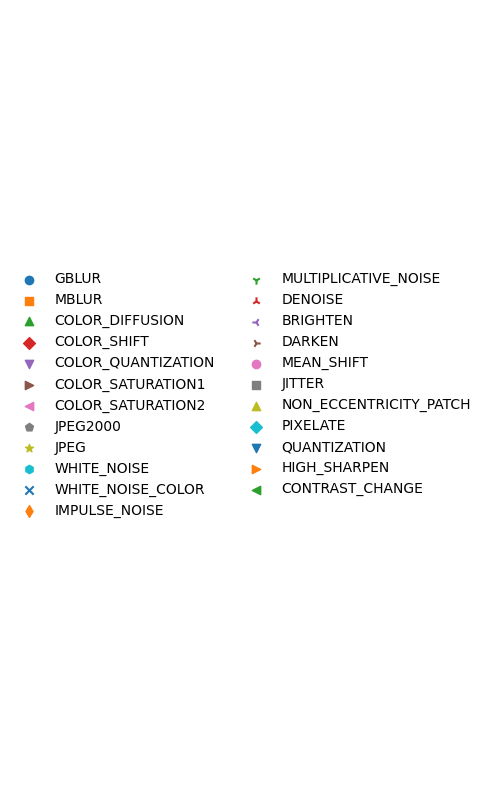

In [37]:

fig_legend = plt.figure(figsize=(2, 10))
fig_legend.legend(legend_handles, legend_labels, loc='center', ncol=2, frameon=False)
fig_legend.savefig("legend_only_kadid.png", bbox_inches='tight')
fig_legend.canvas.draw()
legend_ax = fig_legend.add_subplot(111)
legend_ax.axis('off')
plt.show()
plt.close(fig_legend)  

['tiff_l1', 'fid', 'psnr', 'jpeg2000_lossless_l1', 'ncd_zlib', 'png_l1', 'ncd_bz2', 'webp_lossless_l1']
Available distortion types in CSV:
['gaussian_noise' 'color_noise' 'spatial_noise' 'masked_noise'
 'highfreq_noise' 'impulse_noise' 'quantization_noise' 'blur' 'denoising'
 'jpeg_compression' 'jpeg2000_compression' 'jpeg_errors' 'jpeg2000_errors'
 'pattern_noise' 'local_block' 'intensity_shift' 'contrast_change'
 'color_saturation' 'multiplicative_noise' 'comfort_noise'
 'lossy_compression_noise' 'color_quant_dither' 'chrom_aberration'
 'sparse_sampling']

Distortion types with complete data in both files: ['gaussian_noise', 'color_noise', 'spatial_noise', 'masked_noise', 'highfreq_noise', 'impulse_noise', 'quantization_noise', 'blur', 'denoising', 'jpeg_compression', 'jpeg_errors', 'pattern_noise', 'intensity_shift', 'contrast_change', 'color_saturation', 'multiplicative_noise', 'comfort_noise', 'lossy_compression_noise', 'color_quant_dither', 'chrom_aberration', 'sparse_sampling']


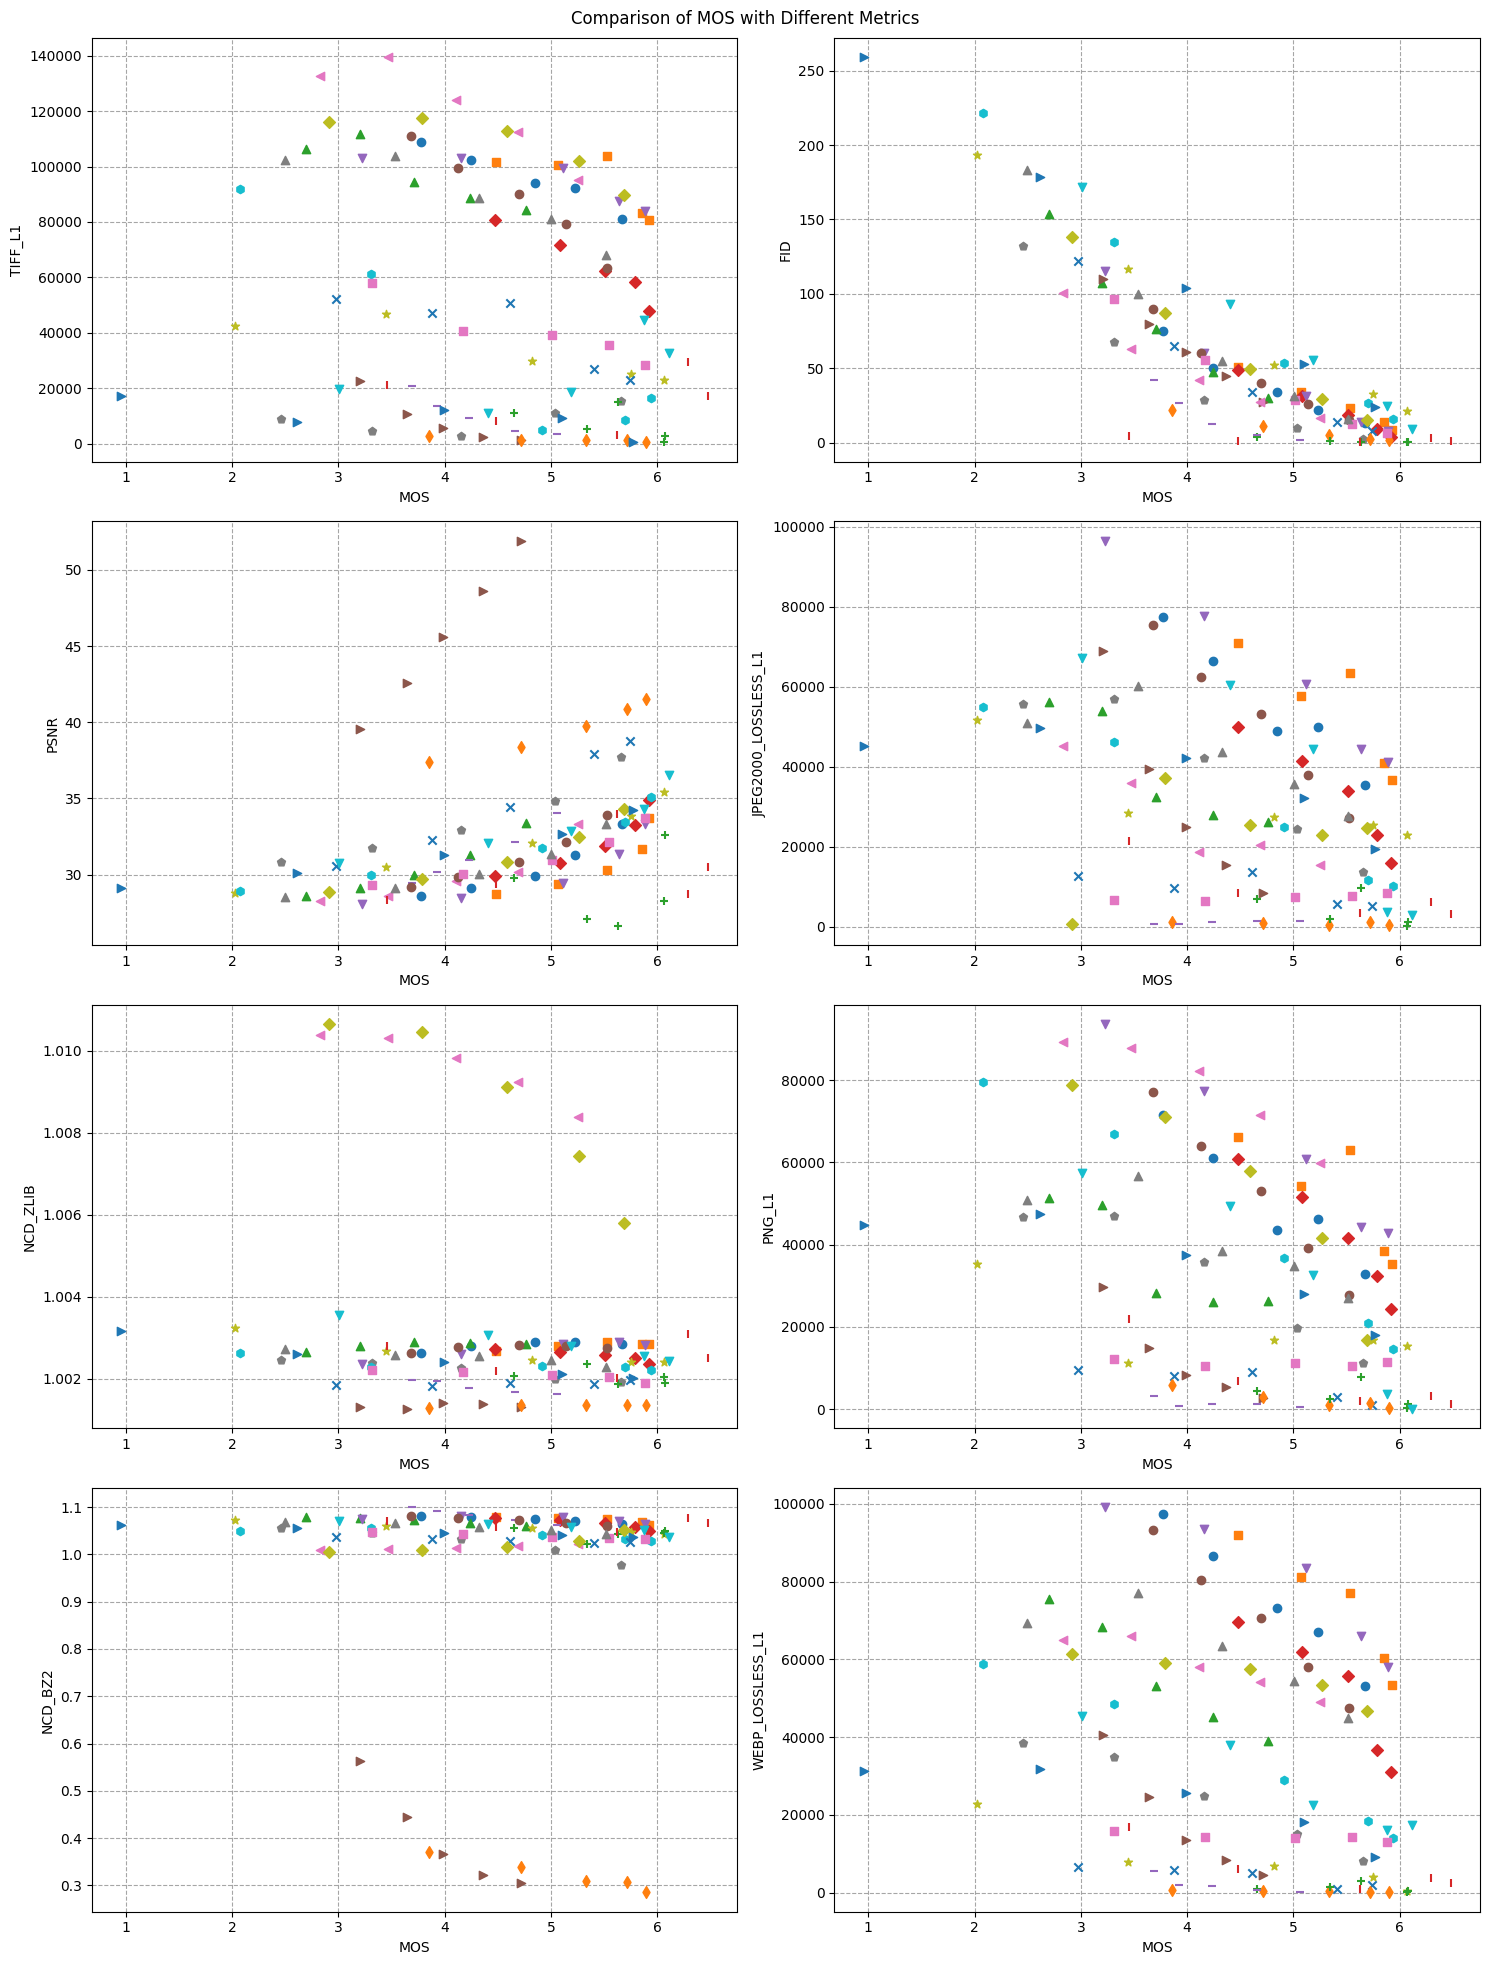

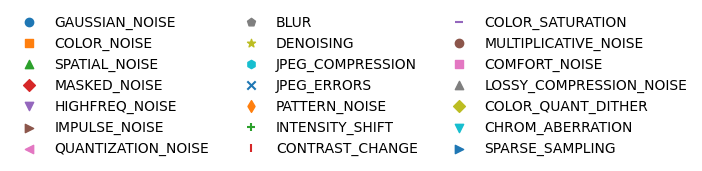

In [33]:
def calculate_agreement(mos_scores, metric_scores, reverse=False):
    
    if reverse:
        metric_scores = [-x for x in metric_scores]

    """
    Calculate agreement between MOS and metric scores for all possible pairs.
    Returns the percentage of pairs where both metrics agree on the ordering.
    """
    n = len(mos_scores)
    agreements = 0
    total_pairs = 0
    
    for i, j in combinations(range(n), 2):
        mos_order = mos_scores[i] > mos_scores[j]
        metric_order = metric_scores[i] > metric_scores[j]
        
        if mos_order == metric_order:
            agreements += 1
        total_pairs += 1
    
    return (agreements / total_pairs) * 100 if total_pairs > 0 else 0

# Read the CSV file
df = pd.read_csv('Image Realism Files/tid_MOS_2.csv')

# Read the JSON file
with open('Image Realism Files/fid_scores_tid.json', 'r') as f:
    fid_data = json.load(f)


# # Add combined metric to the JSON data
# for dst_type in fid_data:
#     if fid_data[dst_type]:  # Check if the distortion type has data
#         for level in fid_data[dst_type]:
#             fid = fid_data[dst_type][level]['fid']
#             l1 = fid_data[dst_type][level]['komorow_l1']
#             fid_data[dst_type][level]['combined'] = np.log(fid * l1)

metrics = set()
for dst_type in fid_data:
    if fid_data[dst_type]:  # Check if the distortion type has data
        for level in fid_data[dst_type]:
            metrics.update(set(list(fid_data[dst_type][level].keys())))

#filter out only these metrics: fid, jpeg2000_lossless_l1, jpeg2000_lossless_l2, ncd_bz2, ncd_zlib, png_l1, png_l2, psnr, tiff_l1, tiff_l2, webp_lossless_l1, webp_lossless_l2
metrics = [m for m in metrics if m in ['fid', 'jpeg2000_lossless_l1', 'ncd_bz2', 'ncd_zlib', 'png_l1', 'psnr', 'tiff_l1', 'webp_lossless_l1']]
print(metrics)

# Print available distortion types in CSV
print("Available distortion types in CSV:")
print(df['dst_type'].unique())

# Mapping between CSV and JSON distortion type names
distortion_mapping = {
    "gaussian_noise": "gaussian_noise",
    "color_noise": "color_noise",
    "spatial_noise": "spatial_noise",
    "masked_noise": "masked_noise",
    "highfreq_noise": "highfreq_noise",
    "impulse_noise": "impulse_noise",
    "quantization_noise": "quantization_noise",
    "blur": "blur",
    "denoising": "denoising",
    "jpeg_compression": "jpeg_compression",
    "jpeg2000_compression": "jpeg2000_compression",
    "jpeg_errors": "jpeg_errors",
    "jpeg2000_errors": "jpeg2000_errors",
    "pattern_noise": "pattern_noise",
    "intensity_shift": "intensity_shift",
    "contrast_change": "contrast_change",
    "color_saturation": "color_saturation",
    "multiplicative_noise": "multiplicative_noise",
    "comfort_noise": "comfort_noise",
    "lossy_compression_noise": "lossy_compression_noise",
    "color_quant_dither": "color_quant_dither",
    "chrom_aberration": "chrom_aberration",
    "sparse_sampling": "sparse_sampling",
}

# Get distortion types that have complete data in both CSV and JSON
available_types = []
for csv_type in df['dst_type'].unique():
    json_type = distortion_mapping.get(csv_type)
    if (json_type and json_type in fid_data and 
        fid_data[json_type] and  # Check if the distortion type has data
        len(fid_data[json_type]) == 5 and 
        all(str(lev) in fid_data[json_type] for lev in range(1, 6))):
        available_types.append((csv_type, json_type))

print("\nDistortion types with complete data in both files:", [csv_type for csv_type, _ in available_types])

# Create a figure with subplots for each metric comparison

n_metrics = len(metrics)
n_cols = 2
n_rows = (n_metrics + n_cols - 1) // n_cols  # Ceiling division to calculate number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.suptitle('Comparison of MOS with Different Metrics')

# Store agreement scores
agreement_scores = {}

# Collect all MOS and metric scores across all distortion types
all_mos_scores = []
all_metric_scores = {metric: [] for metric in metrics}

# Define markers for different distortion types
markers = ['o', 's', '^', 'D', 'v', '>', '<', 'p', '*', 'h', 'x', 'd', '+', '|', '_']

legend_handles = []
legend_labels = []

# Fill in all_mos_scores and all_metric_scores
for csv_type, json_type in available_types:
    mos_data = df[df['dst_type'] == csv_type].groupby('dst_lev')['dmos'].mean()
    all_mos_scores.extend(mos_data.values)
    for metric in metrics:
        metric_scores = [fid_data[json_type][str(lev)][metric] for lev in range(1, 6)]
        all_metric_scores[metric].extend(metric_scores)

# Calculate overall agreement
reverse_metrics = {
    'fid', 'jpeg2000_lossless_l1', 'ncd_bz2', 'ncd_zlib',
    'png_l1', 'tiff_l1', 'webp_lossless_l1'
}

for metric in metrics:
    reverse = metric in reverse_metrics
    agreement = calculate_agreement(all_mos_scores, all_metric_scores[metric], reverse=reverse)
    agreement_scores[metric] = agreement
    print(f"Overall agreement for {metric}: {agreement:.1f}%")

# Plotting loop
for idx, metric in enumerate(metrics):
    row = idx // n_cols
    col = idx % n_cols
    ax = axes[row, col] if n_rows > 1 else axes[col]

    for i, (csv_type, json_type) in enumerate(available_types):
        mos_data = df[df['dst_type'] == csv_type].groupby('dst_lev')['dmos'].mean()
        metric_scores = [fid_data[json_type][str(lev)][metric] for lev in range(1, 6)]

        min_length = min(len(mos_data.values), len(metric_scores))
        mos_values = mos_data.values[:min_length]
        metric_values = metric_scores[:min_length]

        marker = markers[i % len(markers)]
        sc = ax.scatter(mos_values, metric_values, marker=marker, label=csv_type.upper())

        # Only collect legend entries once
        if csv_type.upper() not in legend_labels:
            legend_handles.append(sc)
            legend_labels.append(csv_type.upper())

    ax.set_xlabel('MOS')
    ax.set_ylabel(metric.upper())
    ax.grid(True, linestyle='--', alpha=0.7, color='gray')
    ax.set_axisbelow(True)

# Hide unused subplots
for idx in range(len(metrics), n_rows * n_cols):
    row = idx // n_cols
    col = idx % n_cols
    axes[row, col].axis('off')



plt.tight_layout(rect=[0, 0, 1, 0.99])

plt.savefig("TID_MOS.pdf", format="pdf")  

plt.show()
# Create separate legend figure
legend_fig = plt.figure(figsize=(2, 1))
legend_ax = legend_fig.add_subplot(111)
legend_ax.axis('off')
legend_ax.legend(legend_handles, legend_labels, loc='center', ncol=3, frameon=False)
plt.show()


Distortion types with complete data in both files: ['jpeg', 'jp2k', 'wn', 'gblur', 'fastfading']
MOS: len=25, Metric: len=25
Overall agreement for fid: 87.7%
MOS: len=25, Metric: len=25
Overall agreement for jpeg2000_lossless_l1: 76.0%
MOS: len=25, Metric: len=25
Overall agreement for ncd_bz2: 69.7%
MOS: len=25, Metric: len=25
Overall agreement for ncd_zlib: 69.7%
MOS: len=25, Metric: len=25
Overall agreement for png_l1: 76.3%
MOS: len=25, Metric: len=25
Overall agreement for psnr: 83.7%
MOS: len=25, Metric: len=25
Overall agreement for tiff_l1: 64.0%
MOS: len=25, Metric: len=25
Overall agreement for webp_lossless_l1: 64.0%


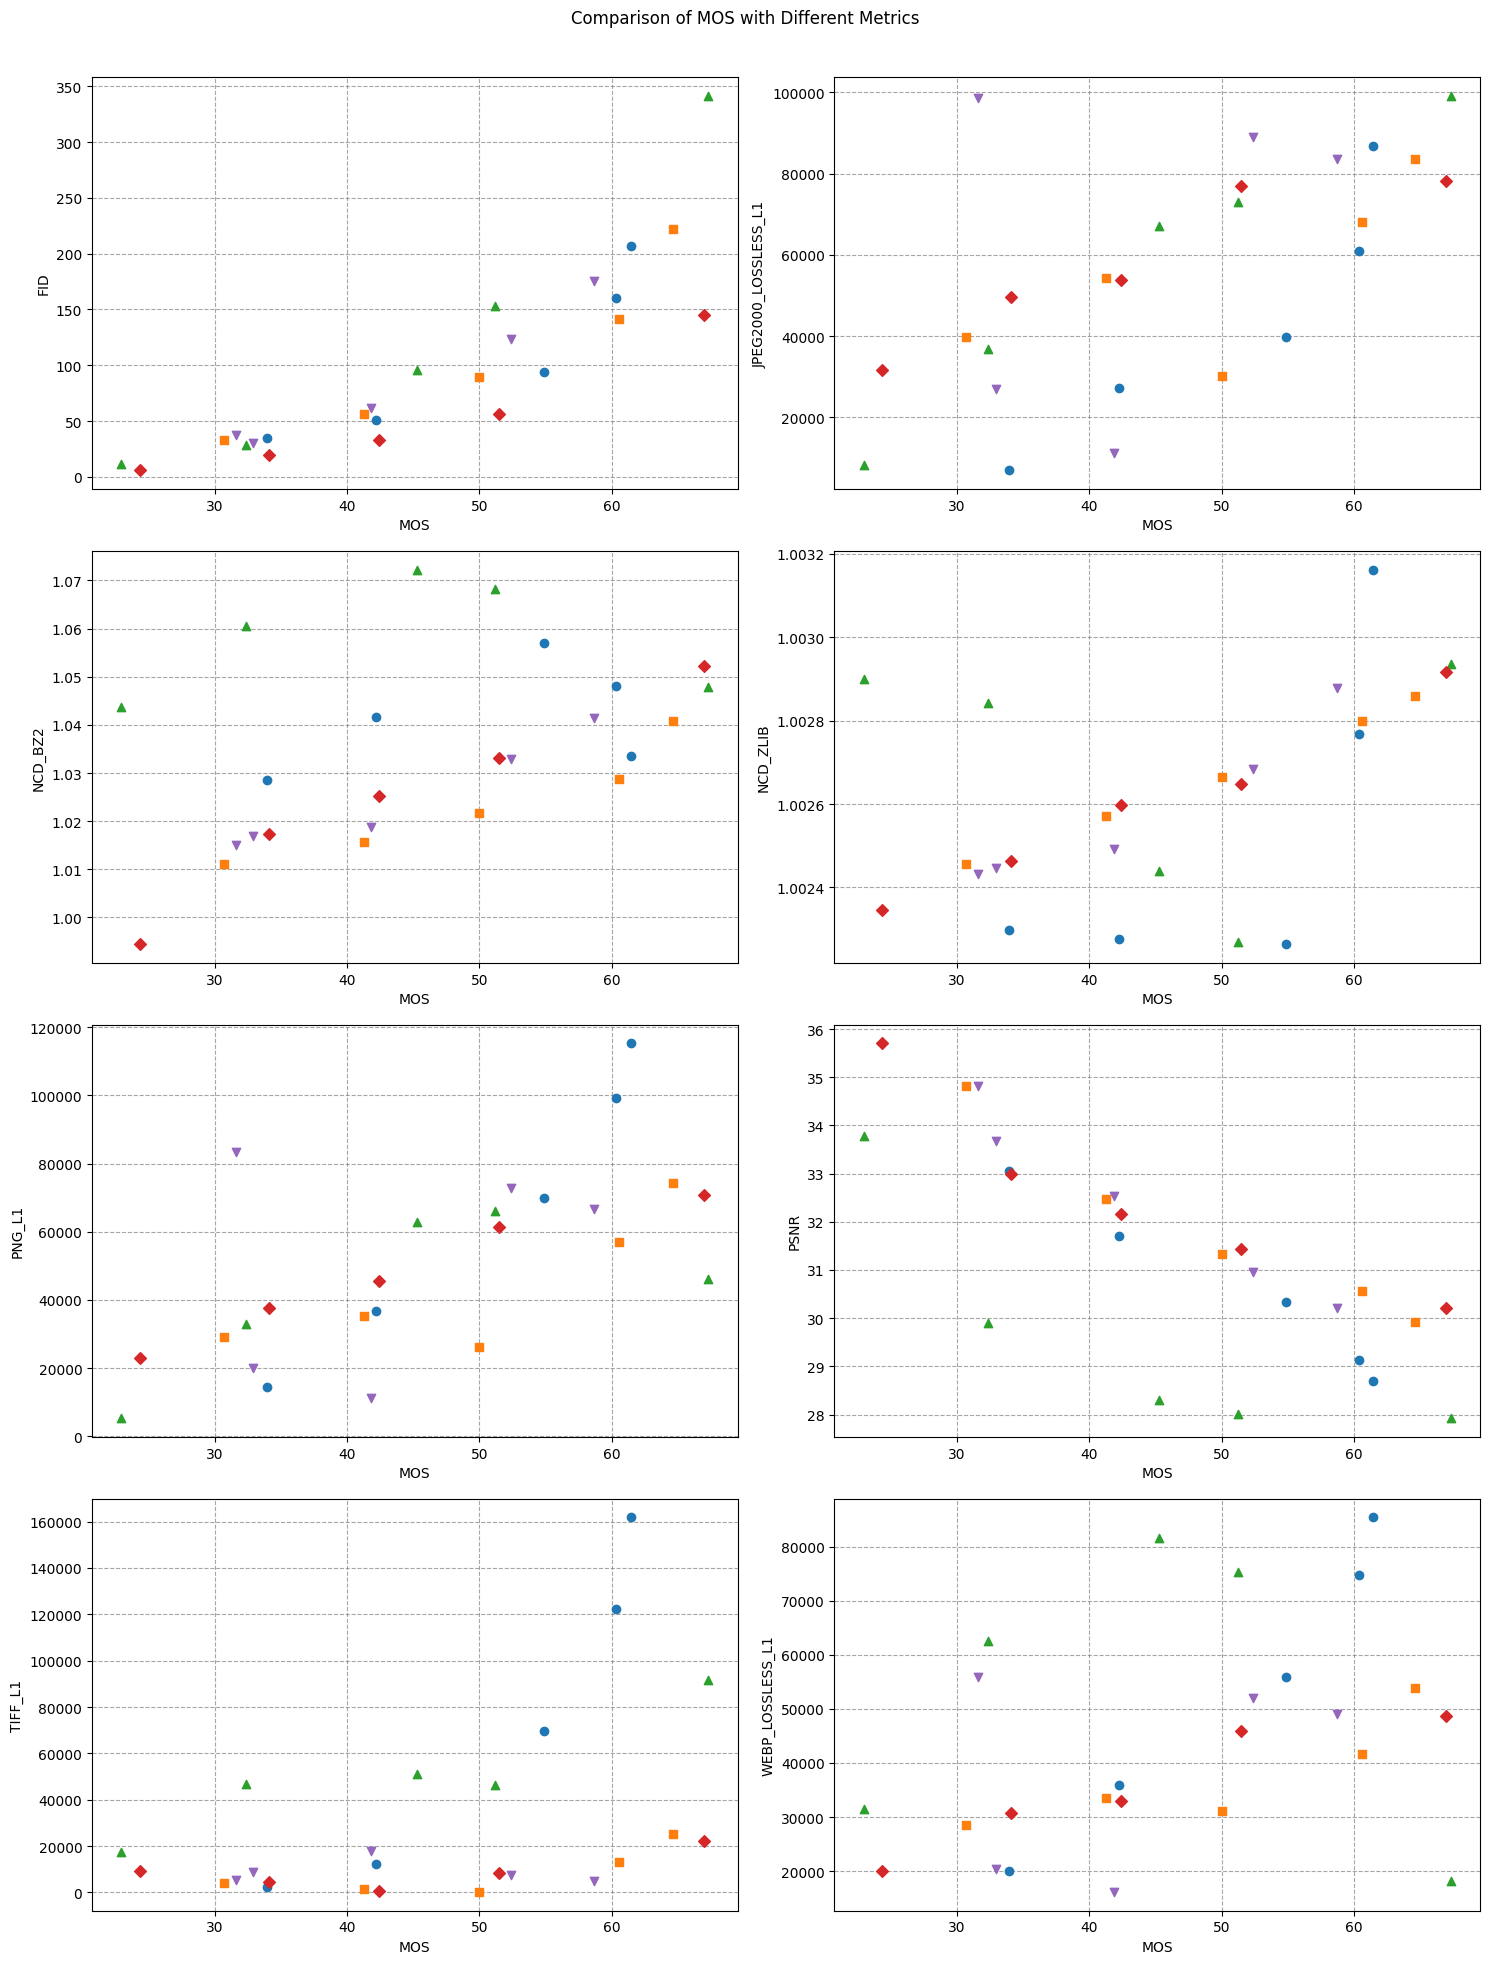

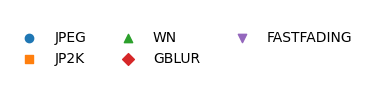

In [32]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
def calculate_agreement(mos_scores, metric_scores, reverse=False):

    if reverse:
        metric_scores = [-x for x in metric_scores]


    """
    Calculate agreement between MOS and metric scores for all possible pairs.
    Returns the percentage of pairs where both metrics agree on the ordering.
    """
    print (f"MOS: len={len(mos_scores)}, Metric: len={len(metric_scores)}")
    n = len(mos_scores)
    agreements = 0
    total_pairs = 0

    
    for i, j in combinations(range(n), 2):
        mos_order = mos_scores[i] < mos_scores[j]
        metric_order = metric_scores[i] < metric_scores[j]
        
        if mos_order == metric_order:
            agreements += 1
        total_pairs += 1
    
    return (agreements / total_pairs) * 100 if total_pairs > 0 else 0

# Read the CSV file 
df = pd.read_csv('Image Realism Files/live_mos.csv')

# Read the JSON file
with open('Image Realism Files/fid_value_live_3.json', 'r') as f:
    fid_data = json.load(f)


# # Add combined metric to the JSON data
# for dist_type in fid_data:
#     if fid_data[dist_type]:  # Check if the distortion type has data
#         for level in fid_data[dist_type]:
#             fid = fid_data[dist_type][level]['fid']
#             l1 = fid_data[dist_type][level]['komorow_l1']
#             fid_data[dist_type][level]['combined'] = np.log(fid * l1)
metrics = [m for m in metrics if m in ['fid', 'jpeg2000_lossless_l1', 'ncd_bz2', 'ncd_zlib', 'png_l1', 'psnr', 'tiff_l1', 'webp_lossless_l1']]
available_types = []
for csv_type in df['dst_type'].unique():
    json_type = csv_type
    if (json_type and json_type in fid_data and 
        fid_data[json_type] and  # Check if the distortion type has data
        len(fid_data[json_type]) == 5 and 
        all(str(lev) in fid_data[json_type] for lev in range(1, 6))):
        available_types.append((csv_type, json_type))

print("\nDistortion types with complete data in both files:", [csv_type for csv_type, _ in available_types])

# Create a figure with subplots for each metric comparison

n_metrics = len(metrics)
n_cols = 2
n_rows = (n_metrics + n_cols - 1) // n_cols  # Ceiling division to calculate number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.suptitle('Comparison of MOS with Different Metrics')

# Store agreement scores
agreement_scores = {}

# Collect all MOS and metric scores across all distortion types
all_mos_scores = []
all_metric_scores = {metric: [] for metric in metrics}

# Define markers for different distortion types
markers = ['o', 's', '^', 'D', 'v', '>', '<', 'p', '*', 'h', 'x', 'd', '+', '|', '_']

legend_handles = []
legend_labels = []

# Fill in all_mos_scores and all_metric_scores
for csv_type, json_type in available_types:
    mos_data = df[df['dst_type'] == csv_type].groupby('dst_ord')['dmos'].mean()
    all_mos_scores.extend(mos_data.values)
    for metric in metrics:
        metric_scores = [fid_data[json_type][str(lev)][metric] for lev in range(1, 6)]
        all_metric_scores[metric].extend(metric_scores)

# Calculate overall agreement
reverse_metrics = {
    'psnr'
}

for metric in metrics:
    reverse = metric in reverse_metrics
    agreement = calculate_agreement(all_mos_scores, all_metric_scores[metric], reverse=reverse)
    agreement_scores[metric] = agreement
    print(f"Overall agreement for {metric}: {agreement:.1f}%")

# Plotting loop

for idx, metric in enumerate(metrics):
    row = idx // n_cols
    col = idx % n_cols
    ax = axes[row, col] if n_rows > 1 else axes[col]

    for i, (csv_type, json_type) in enumerate(available_types):
        mos_data = df[df['dst_type'] == csv_type].groupby('dst_ord')['dmos'].mean()
        metric_scores = [fid_data[json_type][str(lev)][metric] for lev in range(1, 6)]

        min_length = min(len(mos_data.values), len(metric_scores))
        mos_values = mos_data.values[:min_length]
        metric_values = metric_scores[:min_length]

        marker = markers[i % len(markers)]
        sc = ax.scatter(mos_values, metric_values, marker=marker, label=csv_type.upper())

        # Only collect legend entries once
        if csv_type.upper() not in legend_labels:
            legend_handles.append(sc)
            legend_labels.append(csv_type.upper())

    ax.set_xlabel('MOS')
    ax.set_ylabel(metric.upper())
    ax.grid(True, linestyle='--', alpha=0.7, color='gray')
    ax.set_axisbelow(True)

# Hide unused subplots
for idx in range(len(metrics), n_rows * n_cols):
    row = idx // n_cols
    col = idx % n_cols
    axes[row, col].axis('off')

plt.savefig("LIVE_MOS.pdf", format="pdf")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Create separate legend figure
legend_fig = plt.figure(figsize=(2, 1))
legend_ax = legend_fig.add_subplot(111)
legend_ax.axis('off')
legend_ax.legend(legend_handles, legend_labels, loc='center', ncol=3, frameon=False)
plt.show()

## Inter Metric Analysis 

In [83]:
def compute_and_plot_entrywise_agreement(csv_input_path):

    try:
        df = pd.read_csv(csv_input_path)
    except Exception as e:
        print(f"Error loading CSV file: {e}")
        return

    metrics = df.columns
    n_metrics = len(metrics)
    correlation_matrix = np.zeros((n_metrics, n_metrics))

    for i, m1 in enumerate(metrics):
        for j, m2 in enumerate(metrics):
            match = (df[m1] == df[m2]).sum()
            total = len(df)
            correlation_matrix[i, j] = match / total

    corr_df = pd.DataFrame(correlation_matrix, index=metrics, columns=metrics)


    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, fmt=".2f", cmap="viridis", cbar=True)
    plt.title("Entrywise Agreement Between Metrics")
    plt.tight_layout()
    plt.show()

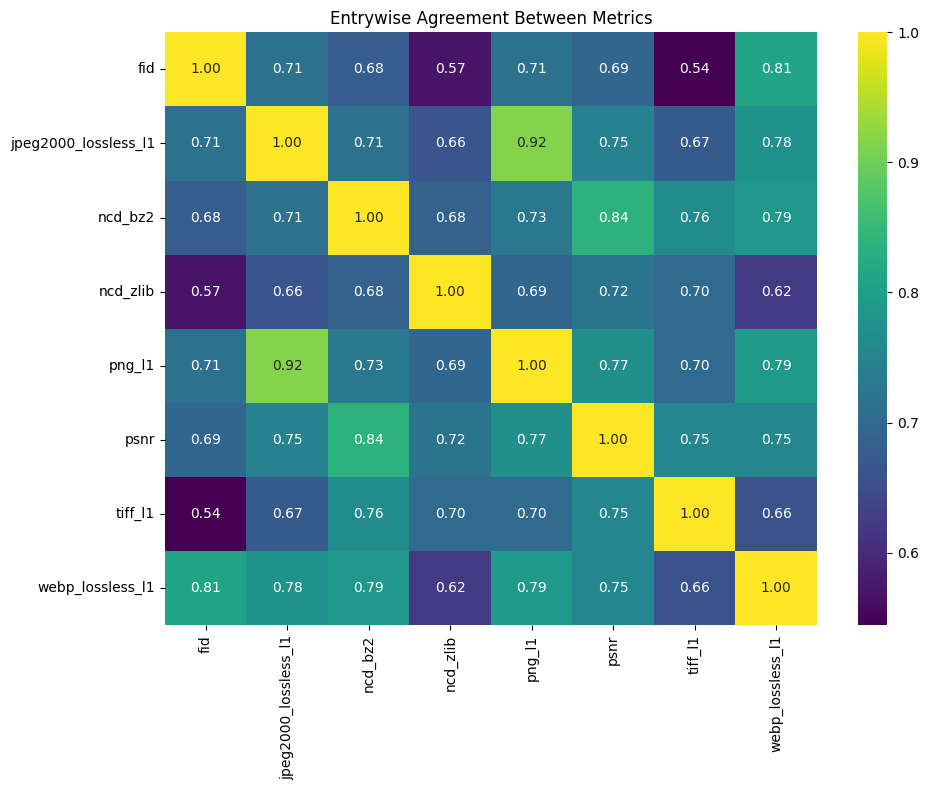

In [84]:
compute_and_plot_entrywise_agreement("Metric Results/agreement_vectors_csiq.csv")

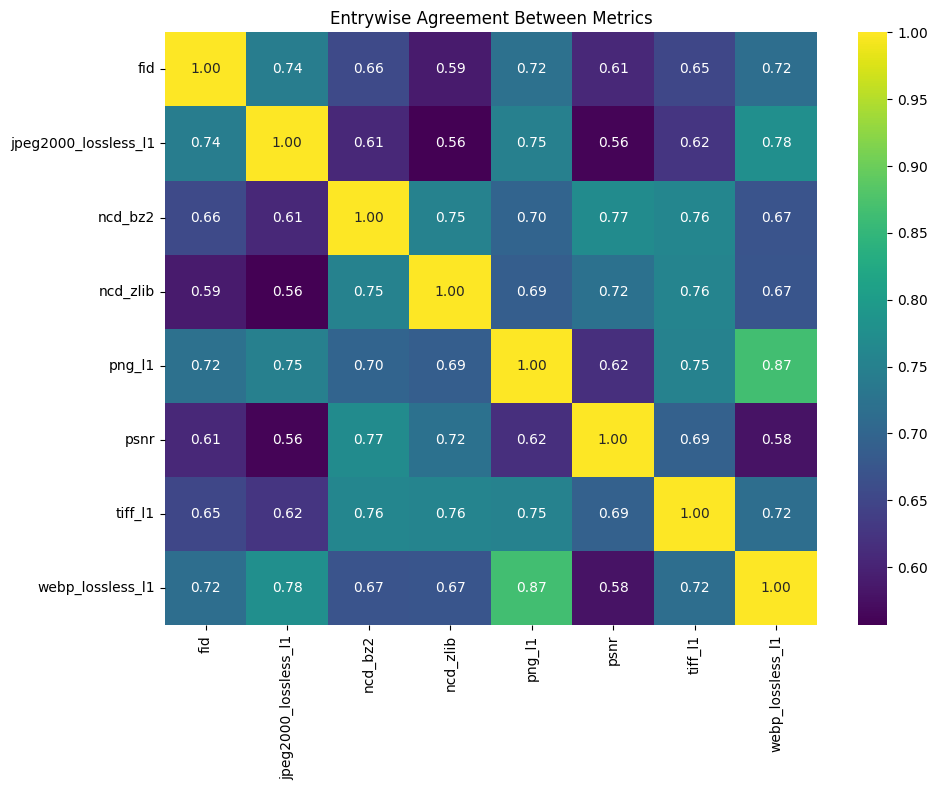

In [85]:
compute_and_plot_entrywise_agreement("Metric Results/agreement_vectors_kadid.csv")

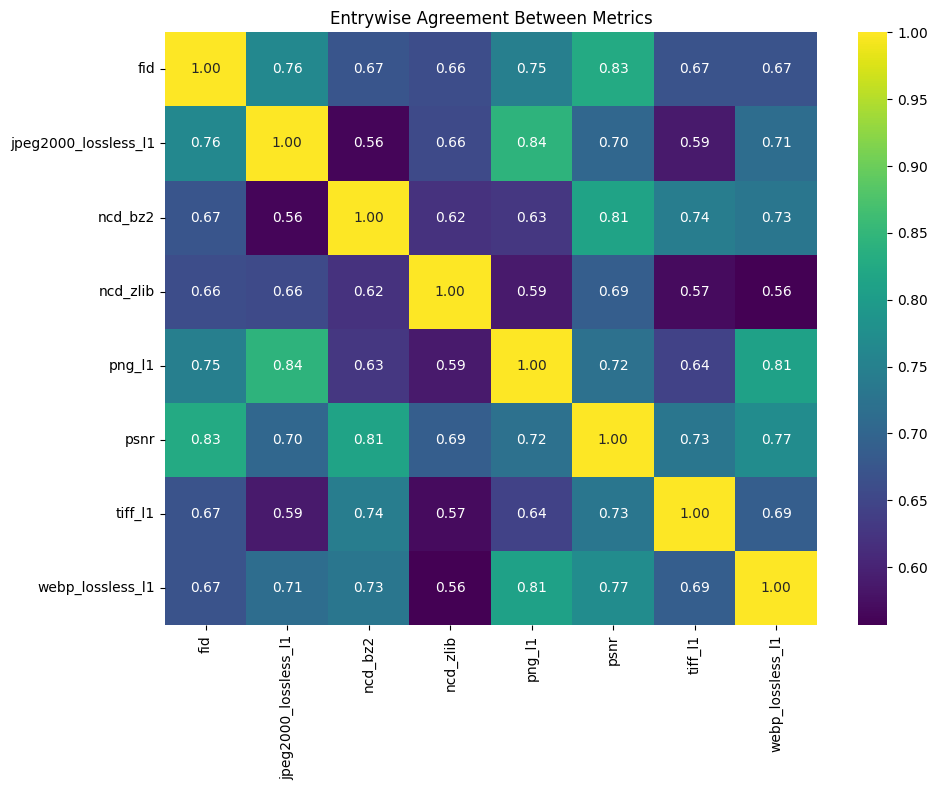

In [86]:
compute_and_plot_entrywise_agreement("Metric Results/agreement_vectors_live.csv")

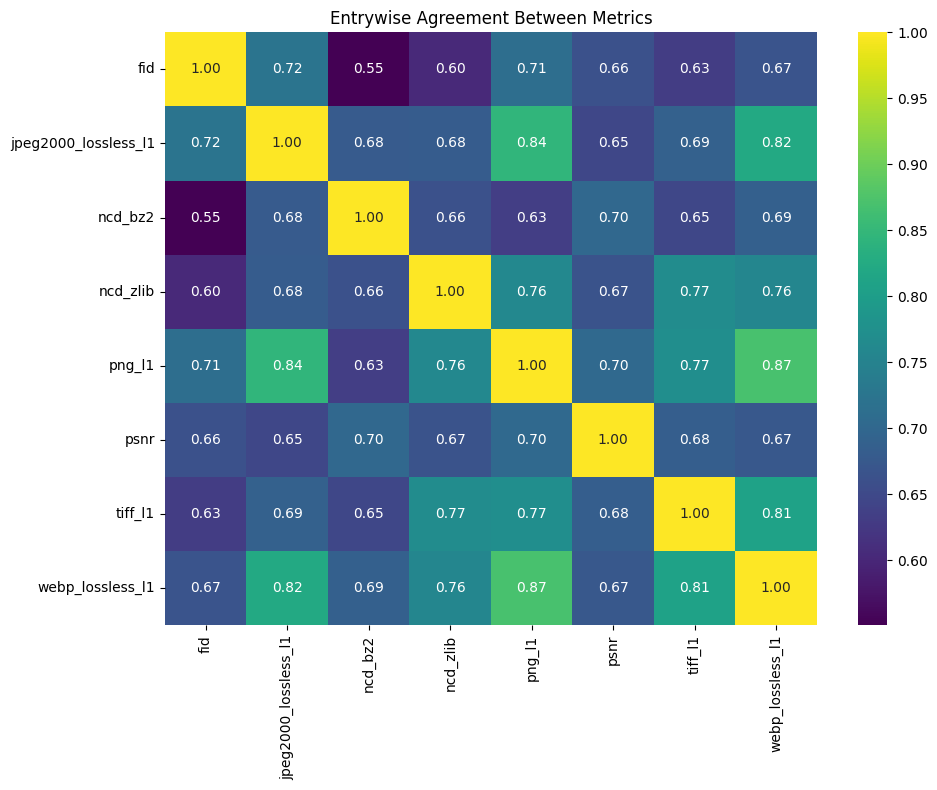

In [87]:
compute_and_plot_entrywise_agreement("Metric Results/agreement_vectors_tid.csv")

In [73]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

def plot_jaccard_similarity(csv_path):
    # Load CSV file
    try:
        data = pd.read_csv(csv_path)
    except Exception as e:
        print(f"Error loading CSV file: {e}")
        return

    df = pd.DataFrame(data)
    
    # Convert all columns to boolean (if 1/0, treat as True/False)
    df_bool = df.astype(bool)

    metrics = df_bool.columns
    jaccard_matrix = pd.DataFrame(index=metrics, columns=metrics, dtype=float)

    # Compute Jaccard similarity for each pair of metrics
    for i in metrics:
        for j in metrics:
            intersection = np.logical_and(df_bool[i], df_bool[j]).sum()
            union = np.logical_or(df_bool[i], df_bool[j]).sum()
            jaccard_matrix.loc[i, j] = intersection / union if union != 0 else np.nan

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(jaccard_matrix.astype(float), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Jaccard Similarity Between Metrics")
    plt.tight_layout()
    plt.show()

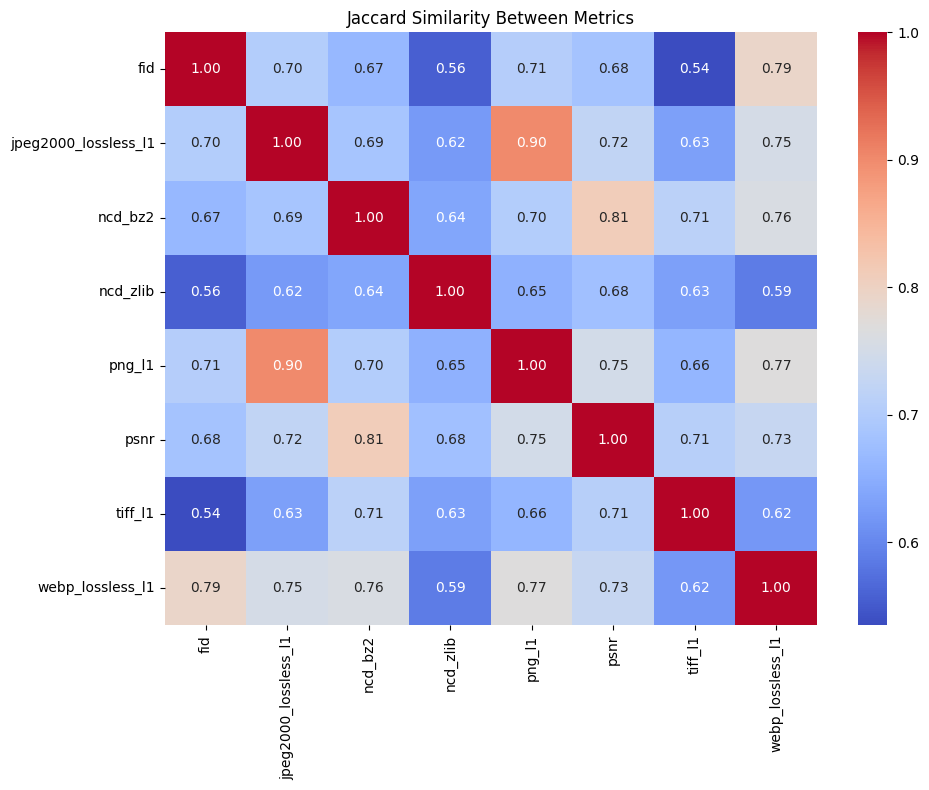

In [74]:
plot_jaccard_similarity("Metric Results/agreement_vectors_csiq.csv")

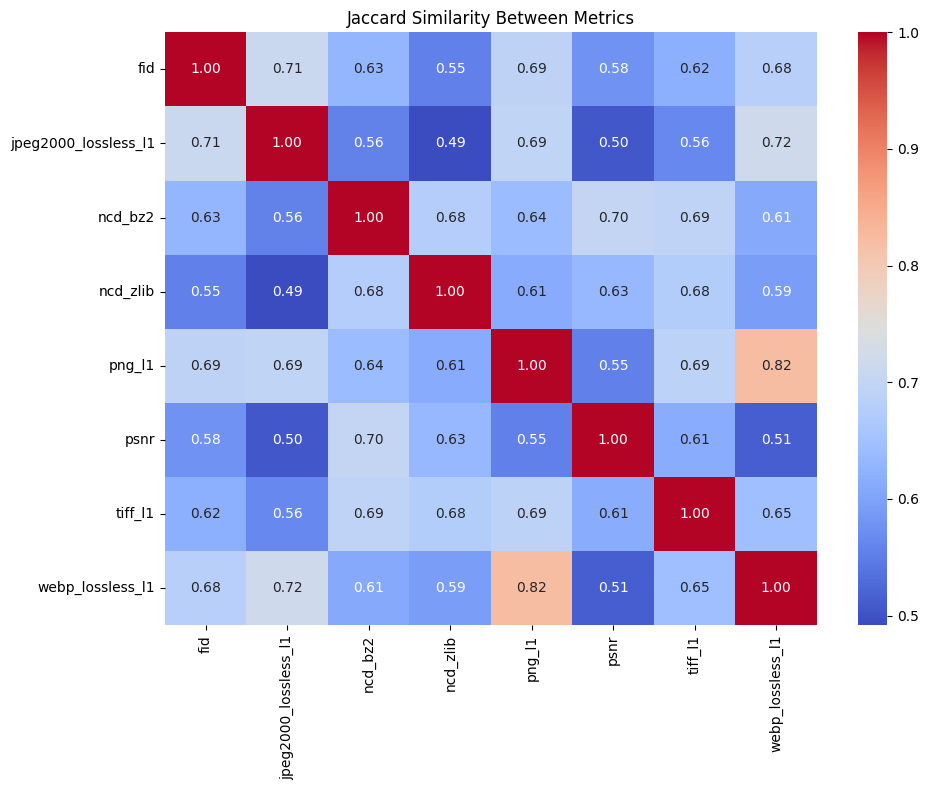

In [75]:
plot_jaccard_similarity("Metric Results/agreement_vectors_kadid.csv")

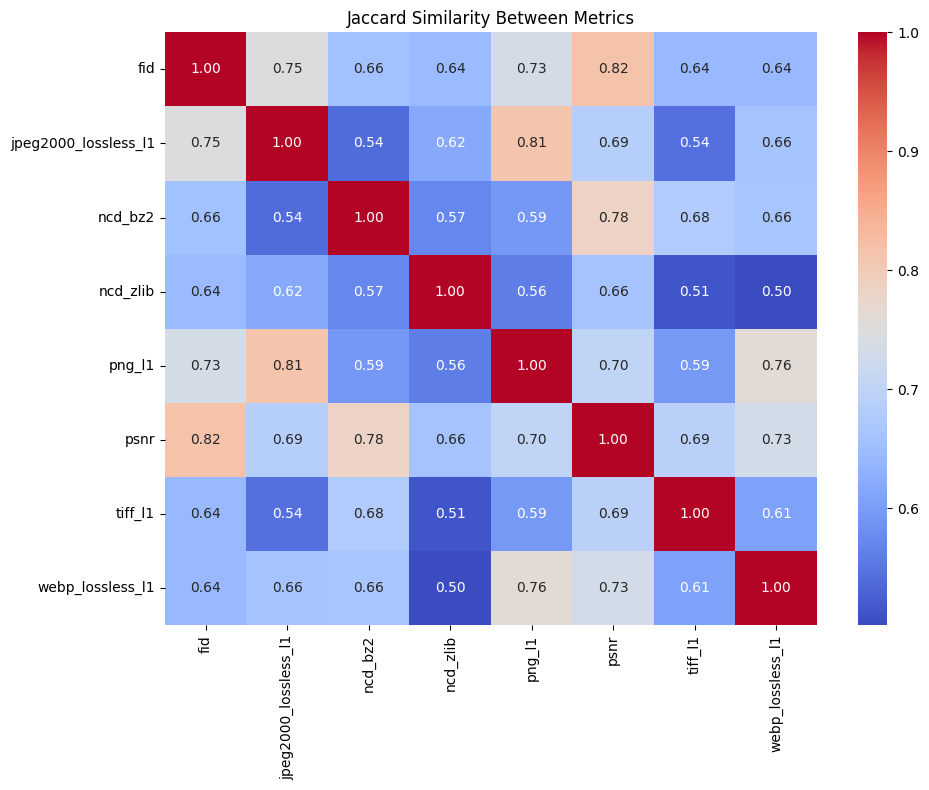

In [76]:
plot_jaccard_similarity("Metric Results/agreement_vectors_live.csv")

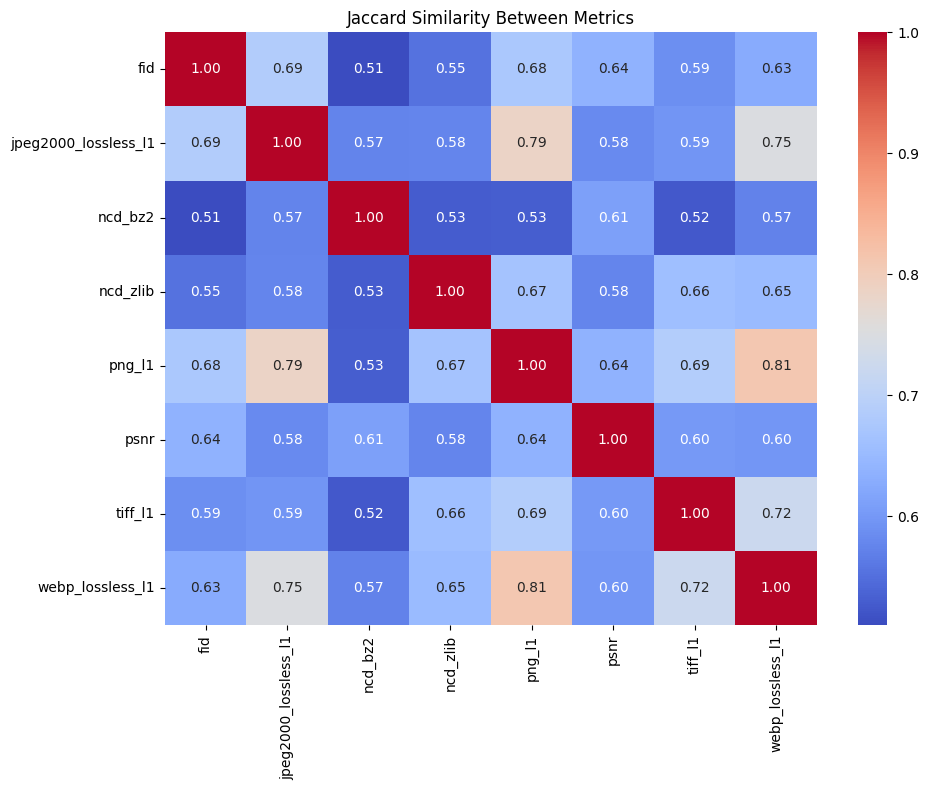

In [77]:
plot_jaccard_similarity("Metric Results/agreement_vectors_tid.csv")

### Complementary Metrics 

In [78]:
def compute_and_plot_complementarity(csv_input_path):
    # Load CSV
    try:
        data = pd.read_csv(csv_input_path)
    except Exception as e:
        print(f"Error loading CSV file: {e}")
        return
    
    metrics = data.columns
    n_metrics = len(metrics)
    
    complementarity_matrix = np.zeros((n_metrics, n_metrics))
    
    for i, m1 in enumerate(metrics):
        for j, m2 in enumerate(metrics):
            a_zero = (data[m1] == 0)
            a_zero_count = a_zero.sum()
            if a_zero_count == 0:
                complement = np.nan
            else:
                b_one_when_a_zero = ((data[m2] == 1) & a_zero).sum()
                complement = b_one_when_a_zero / a_zero_count
            complementarity_matrix[i, j] = complement
    
    complement_df = pd.DataFrame(complementarity_matrix, index=metrics, columns=metrics)
    
    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(complement_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Metric Complementarity (B complements A)")
    plt.tight_layout()
    
    plt.show()

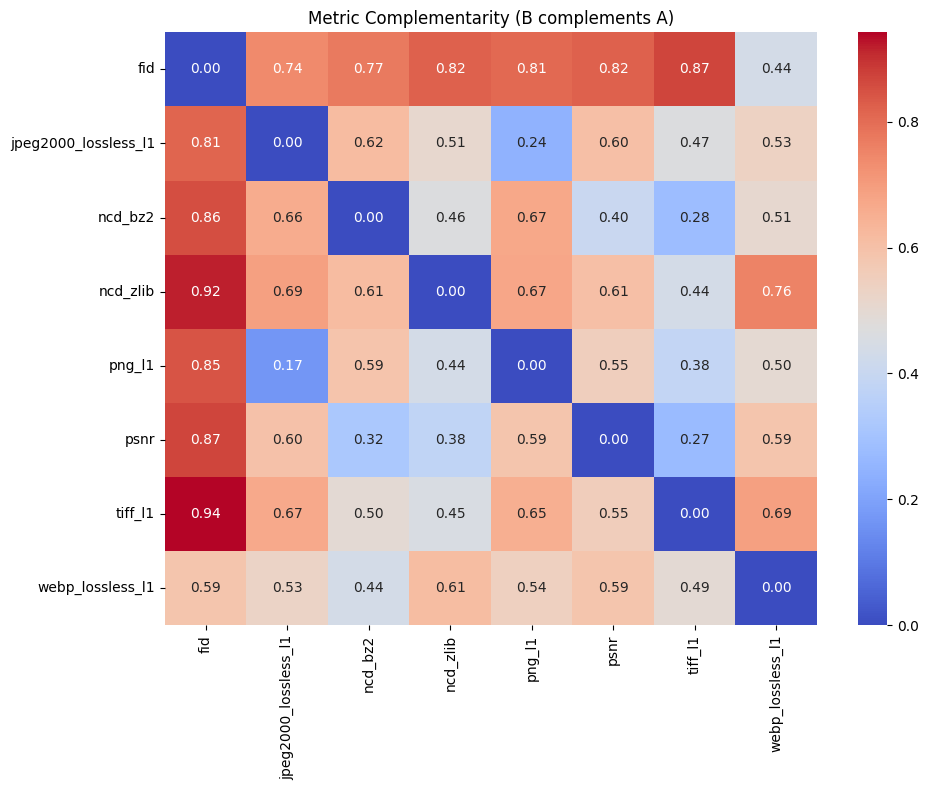

In [79]:
compute_and_plot_complementarity("Metric Results/agreement_vectors_csiq.csv")

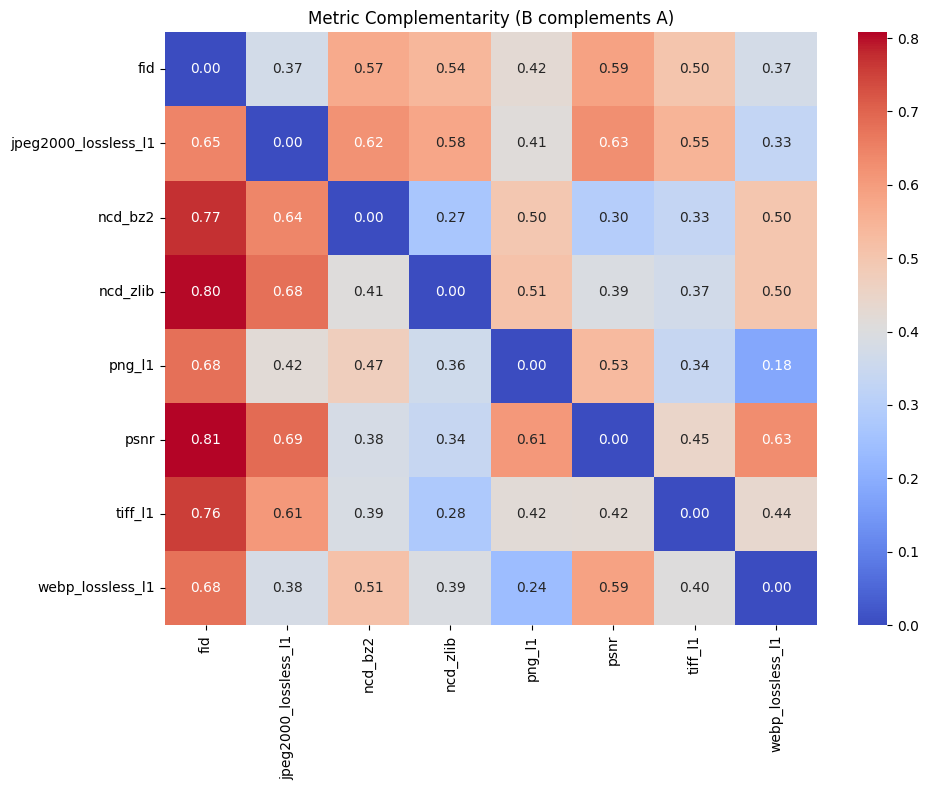

In [80]:
compute_and_plot_complementarity("Metric Results/agreement_vectors_kadid.csv")

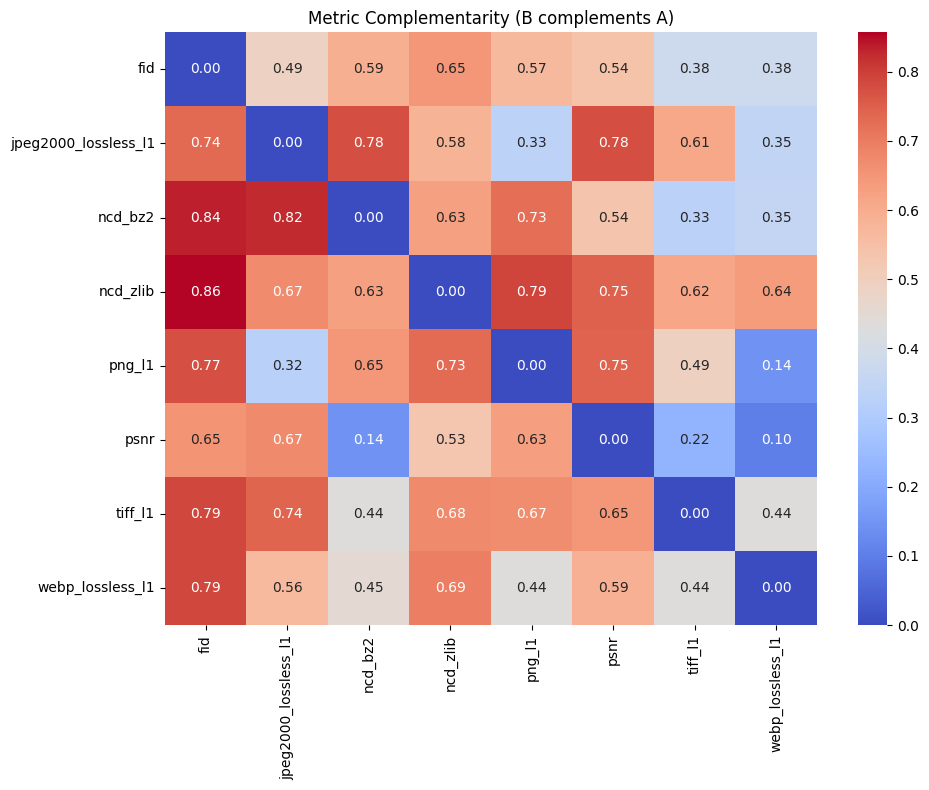

In [81]:
compute_and_plot_complementarity("Metric Results/agreement_vectors_live.csv")

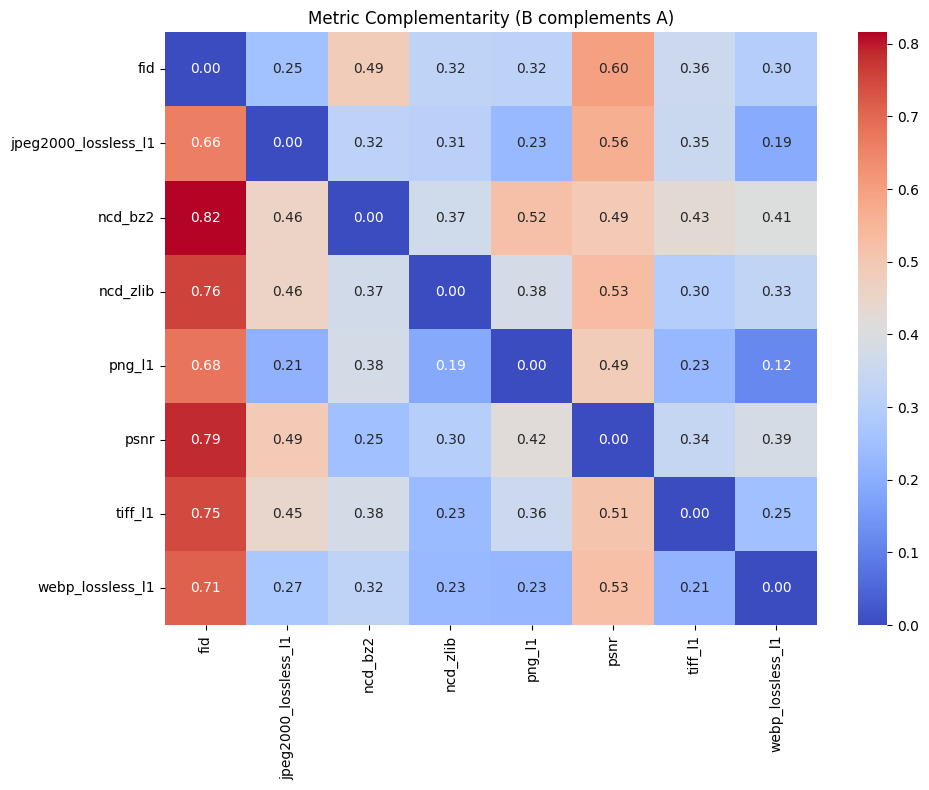

In [82]:
compute_and_plot_complementarity("Metric Results/agreement_vectors_tid.csv")

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

def plot_complementarity(csv_path):
    """
    Reads a CSV with binary agreement vectors and plots the complementarity matrix.
    """
    data = pd.read_csv(csv_path)
    metrics = data.columns
    n_metrics = len(metrics)
    complementarity_matrix = np.zeros((n_metrics, n_metrics))

    # complementarity: (A=0 and B=1) / (A=0)
    for i, m1 in enumerate(metrics):
        for j, m2 in enumerate(metrics):
            a_zero = (data[m1] == 0)
            a_zero_count = a_zero.sum()
            if a_zero_count == 0:
                complement = np.nan
            else:
                b_one_when_a_zero = ((data[m2] == 1) & a_zero).sum()
                complement = b_one_when_a_zero / a_zero_count
            complementarity_matrix[i, j] = complement

    complement_df = pd.DataFrame(complementarity_matrix, index=metrics, columns=metrics)

  
    plt.figure(figsize=(10, 8))
    sns.heatmap(complement_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Metric Complementarity (B complements A)")
    plt.tight_layout()


    plt.show()

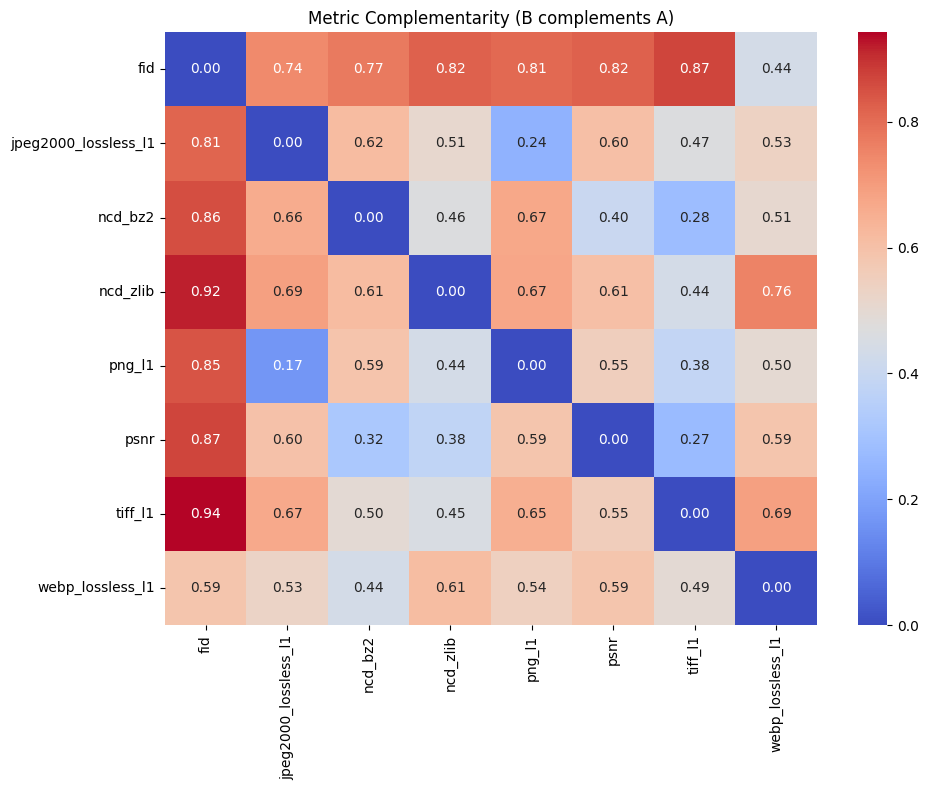

In [90]:
plot_complementarity("Metric Results/agreement_vectors_csiq.csv")

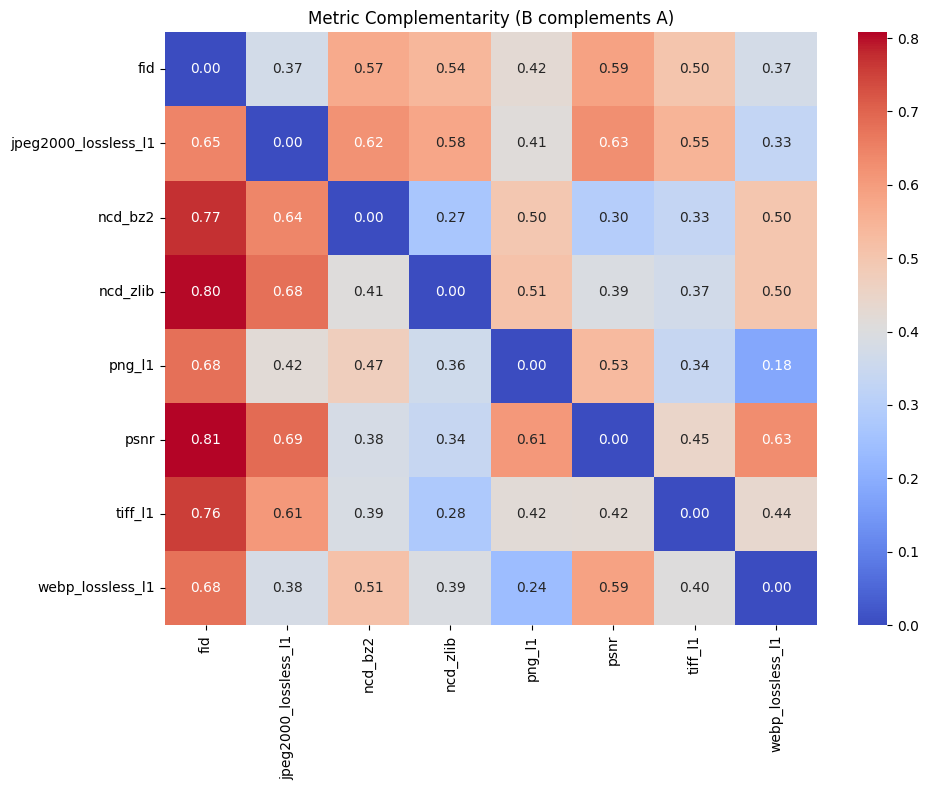

In [91]:
plot_complementarity("Metric Results/agreement_vectors_kadid.csv")

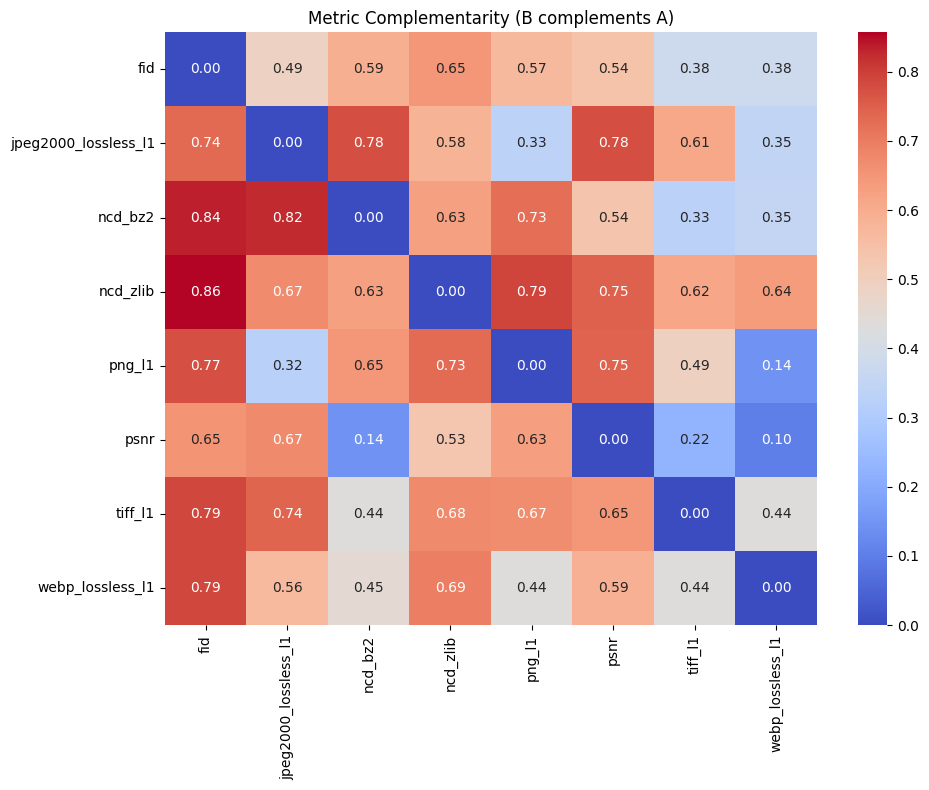

In [92]:
plot_complementarity("Metric Results/agreement_vectors_live.csv")

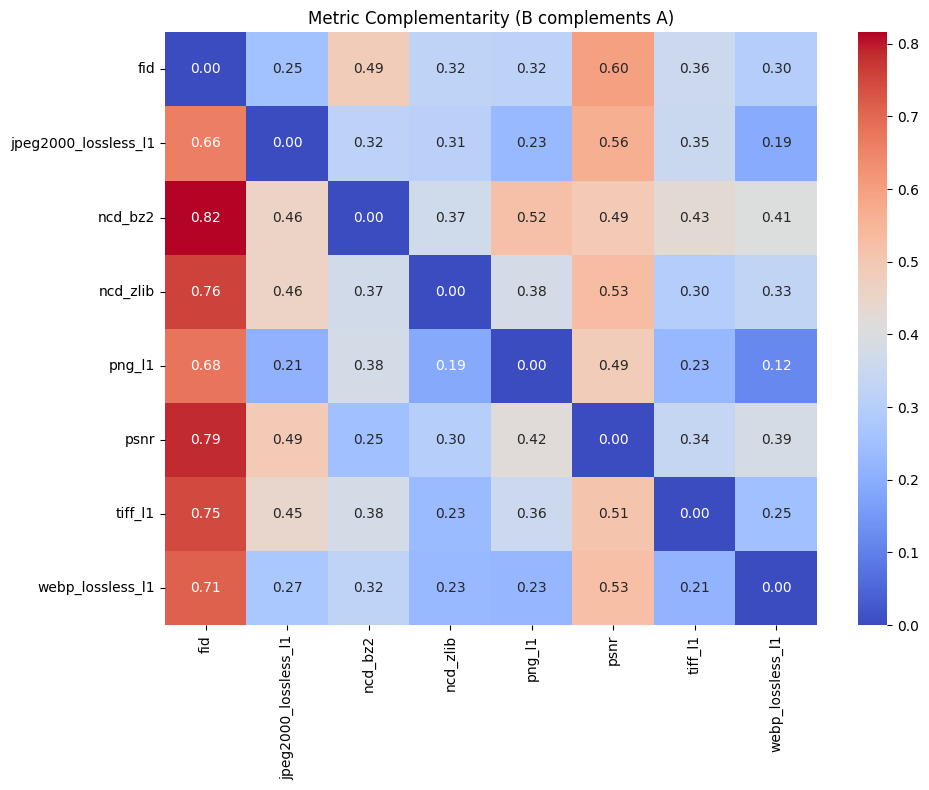

In [93]:
plot_complementarity("Metric Results/agreement_vectors_tid.csv")

Calculating agreement for 18 scores...
Overall agreement for fid: 82.35%
Calculating agreement for 18 scores...
Overall agreement for psnr: 77.78%
Calculating agreement for 18 scores...
Overall agreement for ncd_zlib: 60.78%
Calculating agreement for 18 scores...
Overall agreement for ncd_bz2: 78.43%
Calculating agreement for 18 scores...
Overall agreement for png_l1: 62.75%
Calculating agreement for 18 scores...
Overall agreement for tiff_l1: 62.75%
Calculating agreement for 18 scores...
Overall agreement for webp_l1: 64.71%


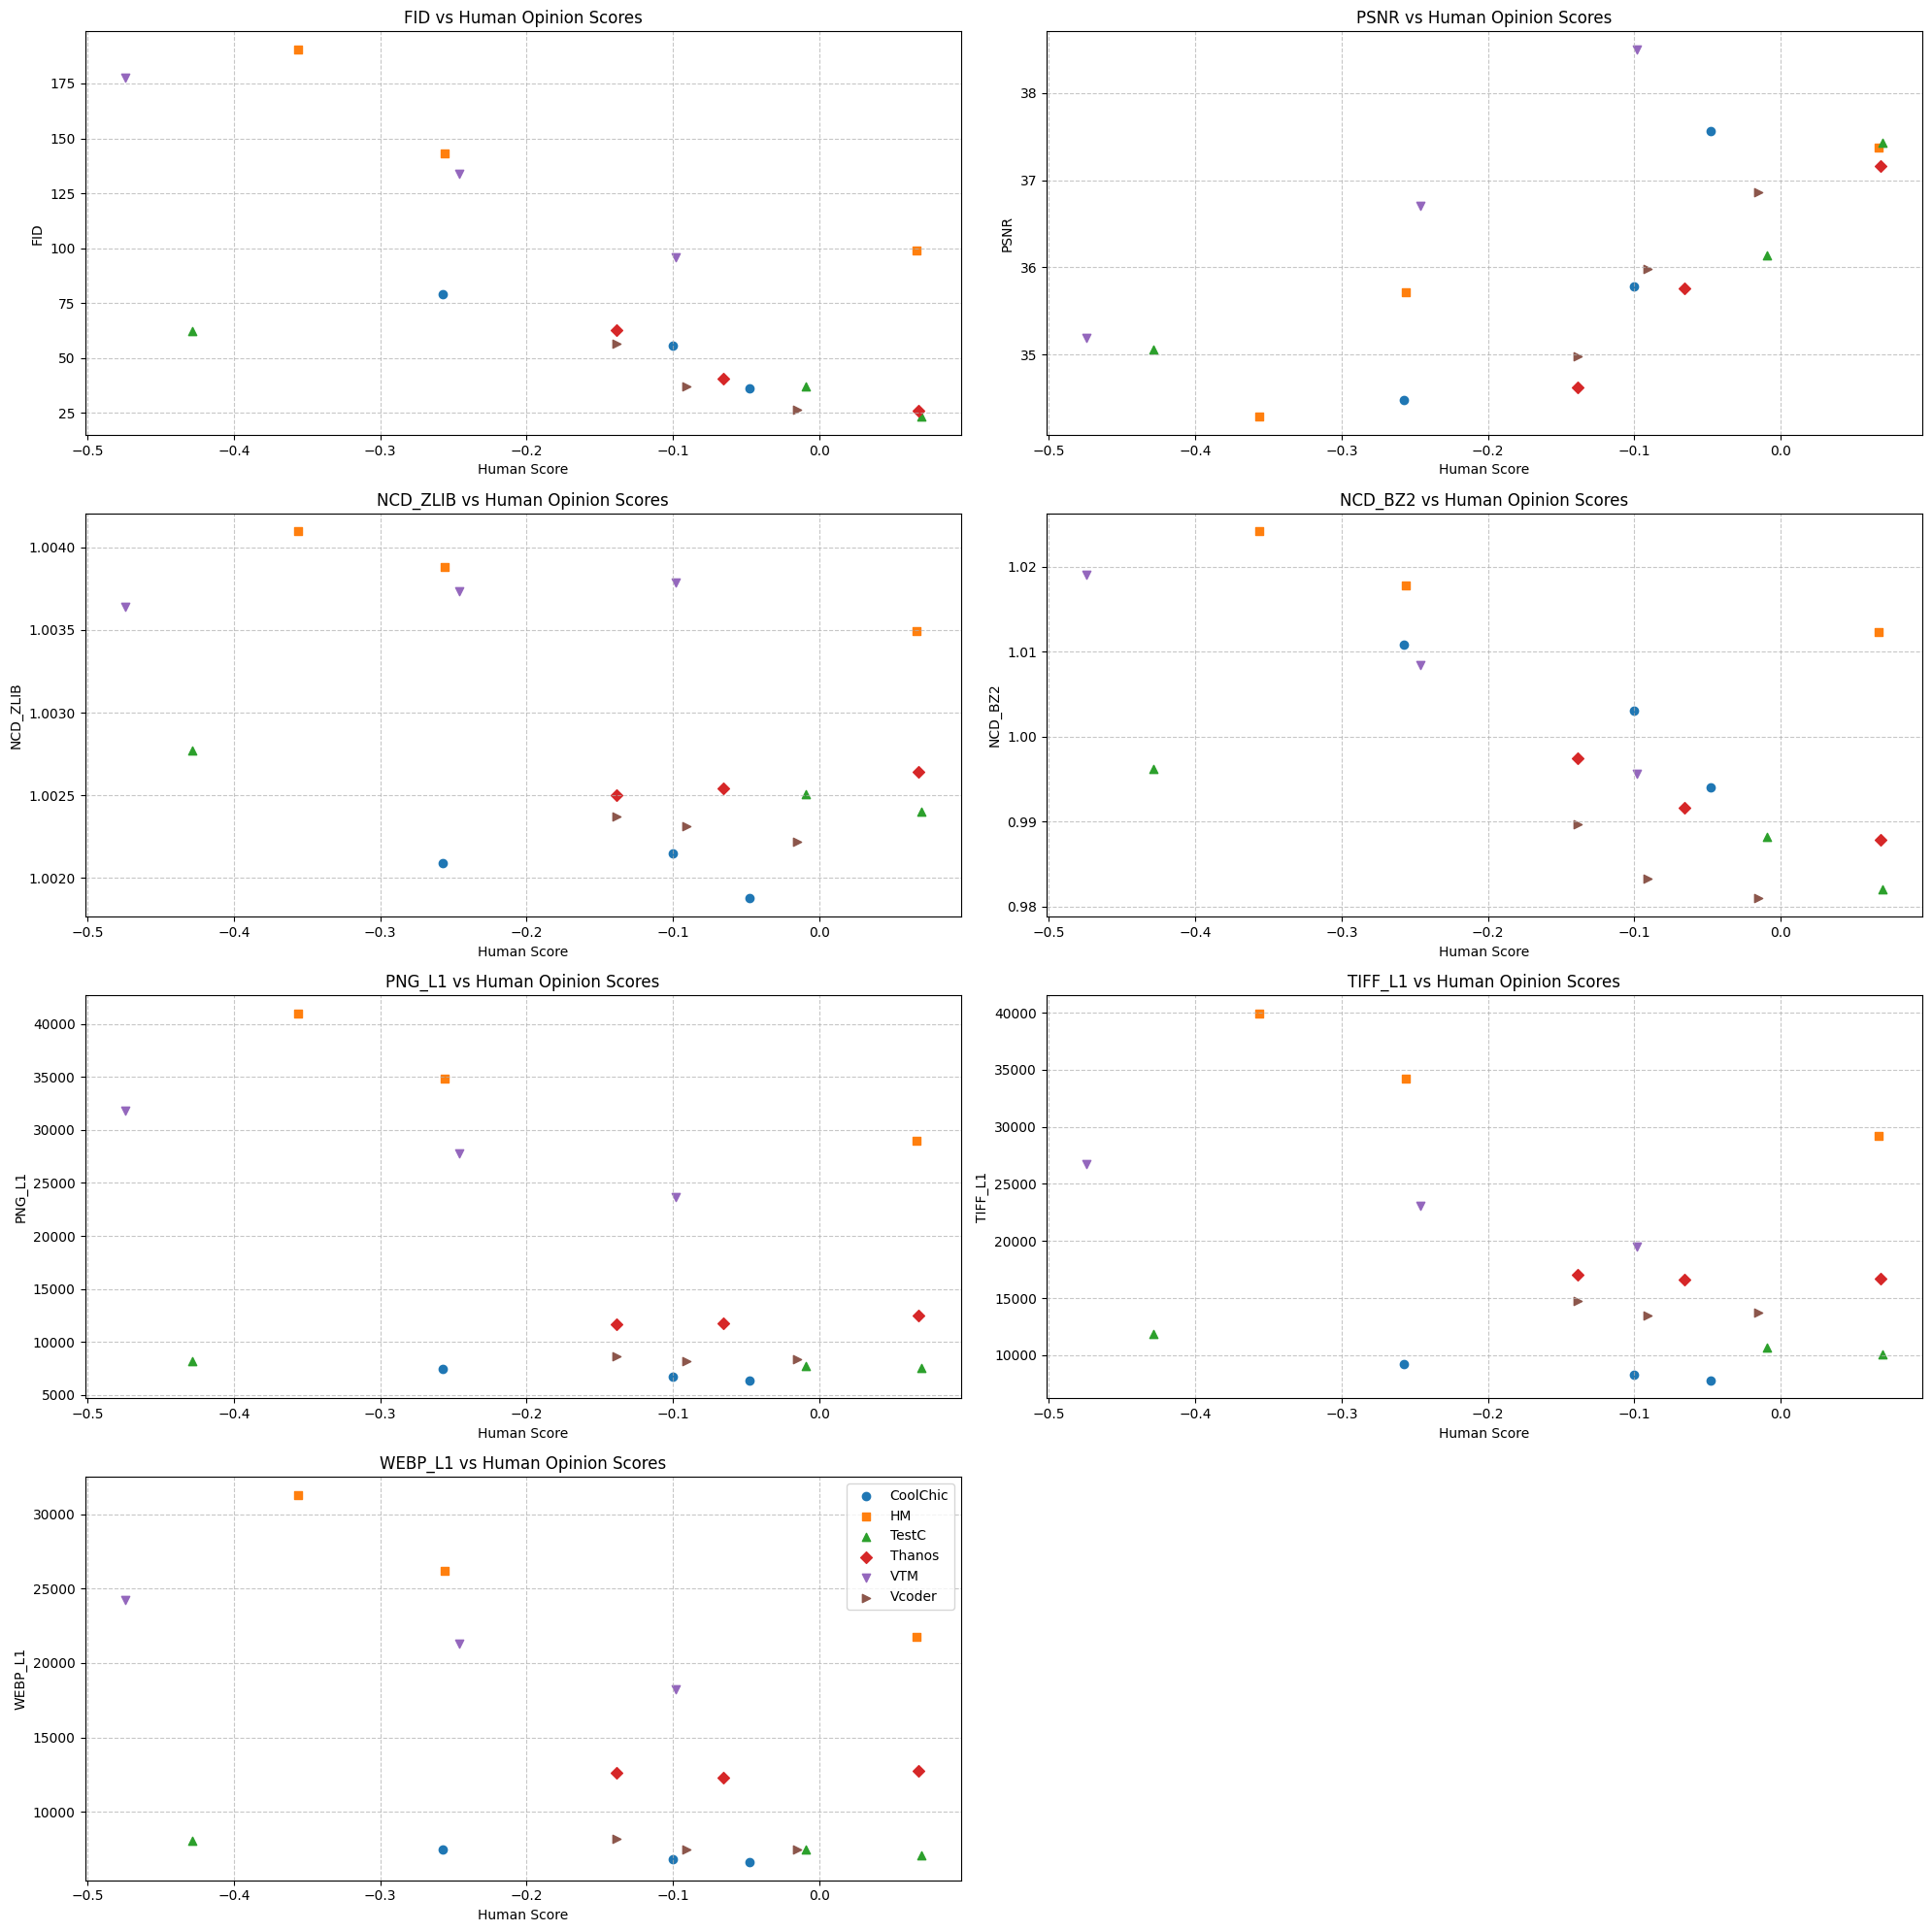

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle, combinations
import numpy as np
import csv

with open('CLIQ_Experiment/realism.json', 'r') as f:
    human_data = json.load(f)


human_rows = []
scores = human_data[0]['scores']  # realism.json is a list with one dict
for entry in scores:
    method_full = entry['method']
    value = entry['value']  # mean over human scores
    if '@ bpp=' in method_full:
        method_name, bpp_str = method_full.split('@ bpp=')
        bpp = float(bpp_str)
    else:
        method_name = method_full
        bpp = np.nan
    human_rows.append({'method': method_name.strip(), 'bpp': bpp, 'human_score': value})

df_humans = pd.DataFrame(human_rows)

with open('CLIQ_Experiment/metrics_per_image.json', 'r') as f:
    metrics_data = json.load(f)

metrics_rows = []
for img_id, methods in metrics_data.items():
    for method, bpps in methods.items():
        for bpp, metrics in bpps.items():
            row = {'img_id': img_id, 'method': method, 'bpp': float(bpp)}
            row.update(metrics)
            metrics_rows.append(row)

df_metrics = pd.DataFrame(metrics_rows)

numeric_cols = df_metrics.select_dtypes(include=np.number).columns
numeric_cols = [c for c in numeric_cols if c not in ['bpp']]  # keep bpp for grouping

df_metrics_mean = df_metrics.groupby(['method', 'bpp'])[numeric_cols].mean().reset_index()

df_combined = pd.merge(df_metrics_mean, df_humans, on=['method', 'bpp'], how='inner')

def calculate_agreement(mos_scores, metric_scores, reverse=False):
    n = len(mos_scores)
    print(f"Calculating agreement for {n} scores...")
    agreements = 0
    total_pairs = 0
    if reverse:
        metric_scores = [-score for score in metric_scores]
    for i, j in combinations(range(n), 2):
        mos_order = mos_scores[i] > mos_scores[j]
        metric_order = metric_scores[i] > metric_scores[j]
        if mos_order == metric_order:
            agreements += 1
        total_pairs += 1
    return (agreements / total_pairs) * 100 if total_pairs > 0 else 0


metrics_list = ['fid', 'psnr', 'ncd_zlib', 'ncd_bz2', 'png_l1', 'tiff_l1', 'webp_l1']
reverse_metrics = ['fid', 'ncd_zlib', 'ncd_bz2', 'png_l1', 'tiff_l1', 'webp_l1']

agreement_scores = {}
for metric in metrics_list:
    reverse = metric in reverse_metrics
    agreement = calculate_agreement(
        df_combined['human_score'].tolist(),
        df_combined[metric].tolist(),
        reverse=reverse
    )
    agreement_scores[metric] = agreement
    print(f"Overall agreement for {metric}: {agreement:.2f}%")

markers = cycle(['o', 's', '^', 'D', 'v', '>', '<', 'p', '*', 'h'])
colors = cycle(plt.cm.tab10.colors)  # 10 distinct colors

method_list = df_combined['method'].unique()
method_styles = {method: (next(colors), next(markers)) for method in method_list}


n_metrics = len(metrics_list)
n_cols = 2
n_rows = (n_metrics + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10*n_cols, 5*n_rows))
axes = axes.flatten()

for idx, metric in enumerate(metrics_list):
    ax = axes[idx]
    for method in method_list:
        df_method = df_combined[df_combined['method'] == method]
        color, marker = method_styles[method]
        ax.scatter(df_method['human_score'], df_method[metric], color=color, marker=marker, label=method)
    ax.set_xlabel('Human Score')
    ax.set_ylabel(metric.upper())
    ax.set_title(f"{metric.upper()} vs Human Opinion Scores")
    ax.grid(True, linestyle='--', alpha=0.7)

axes[idx].legend(loc='best')

for j in range(idx+1, n_rows*n_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.savefig('metrics_vs_human.pdf', format='pdf')
plt.show()

Here, we have the quality setting 0.0 instead of the setting 2.0 which we used the aformentioned experiments.

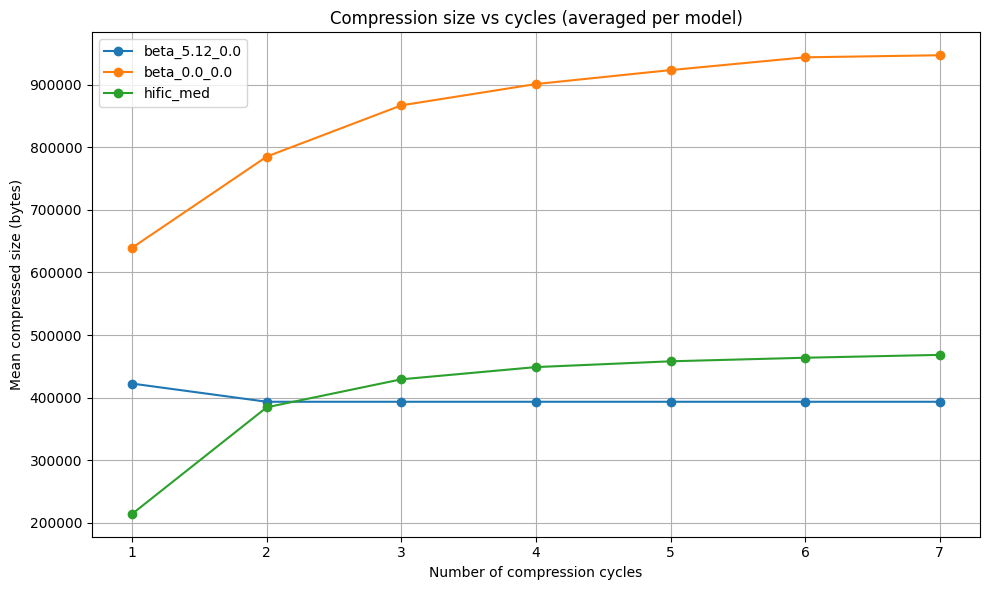

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV paths
csv_files = {
    "beta_5.12_0.0": "Recompression_Complexity_Experiment/beta_5.12_0.0_l1_distances.csv",
    "beta_0.0_0.0": "Recompression_Complexity_Experiment/beta_0.0_0.0_l1_distances.csv",
    "hific_med": "Recompression_Complexity_Experiment/hific_med_l1_distances.csv"
}

results = {}

for model, path in csv_files.items():
    df = pd.read_csv(path)
    
    # special case: hific-med already has "avg" row
    if model == "hific_med":
        results[model] = df.iloc[0, 1:].values.tolist()  # skip "Image" column
    else:
        # take mean over all images per cycle
        results[model] = df.drop(columns=["Image"]).mean(axis=0).tolist()

plt.figure(figsize=(10,6))

for model, means in results.items():
    cycles = list(range(1, len(means)+1))
    plt.plot(cycles, means, marker="o", label=model)

plt.xlabel("Number of compression cycles")
plt.ylabel("Mean compressed size (bytes)")
plt.title("Compression size vs cycles (averaged per model)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()